# USA Regional Sales Analysis

## Project Summary
This EDA notebook dives into Acme Co.’s 2014–2018 USA sales dataset through:

- Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

- Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

- Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

- Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

- Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

## Problem
Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

## Objective
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

- Identify top-performing products, channels, and regions driving revenue and profit
- Uncover seasonal trends and anomalies for optimized planning
- Spot pricing and margin risks from outlier transactions
- Inform pricing, promotion, and market-expansion strategies

These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

## Setup

In [8]:
# Import libraries
# Data handling
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

# 📂 2. LOAD DATA
# Remove these Google Colab lines:
# from google.colab import drive
# drive.mount('/content/drive')

# Use local file path instead
file_path = 'Regional Sales Dataset.xlsx'  # Note: corrected filename

# Read all sheets at once
sheets = pd.read_excel(file_path, sheet_name=None)

# Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

## Data profiling / Initial Inspection

In [9]:

# 🔍 2.1 QUICK SHAPE OVERVIEW
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [10]:
# Data exploration
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [12]:
# QUICK VIEW OF ALL RAW DATAFRAMES
# -----------------------------------------
# Print first few rows for each sheet

print("\n—-- df_sales head --—")
display(df_sales.head())
print()

print("\n—-- df_customers head --—")
display(df_customers.head())
print()

print("\n—-- df_products head --—")
display(df_products.head())
print()

print("\n—-- df_regions head —--")
display(df_regions.head())
print()

print("\n—-- df_state_reg head —--")
display(df_state_reg.head())
print()

print("\n—-- df_budgets head --—")
display(df_budgets.head())


—-- df_sales head --—


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




—-- df_customers head --—


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




—-- df_products head --—


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




—-- df_regions head —--


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




—-- df_state_reg head —--


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




—-- df_budgets head --—


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [13]:
# The first row of df_state_reg contains the real column names.
new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop=True)

In [14]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [15]:
len(df_sales) == len(df_sales.drop_duplicates())

True

## Data Cleaning

In [17]:
# DATA WRANGLING & MERGING

# Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

# Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [18]:
# Convert all column names to lowercase for consistency and easier access
df.columns = df.columns.str.lower()

In [19]:
# Display the updated list of column names
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
# DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]


# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.head()

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [21]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date', 'product_name', 'revenue', 'budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [23]:
# check for missing values in each column of the dataset
df.isnull().sum()

order_number         0
order_date           0
customer_name        0
channel              0
product_name         0
quantity             0
unit_price           0
revenue              0
cost                 0
state                0
state_name           0
us_region            0
lat                  0
lon                  0
budget           48841
dtype: int64

## Feature Engineering

In [24]:
# 1. Calculate total cost for each line item
df['total_cost'] = df['quantity'] * df['cost']

# 2. Calculate profit as revenue minus total_cost
df['profit'] = df['revenue'] - df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


# Exploratory Analysis

## 1. Monthly Sales Trend Over Time

Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

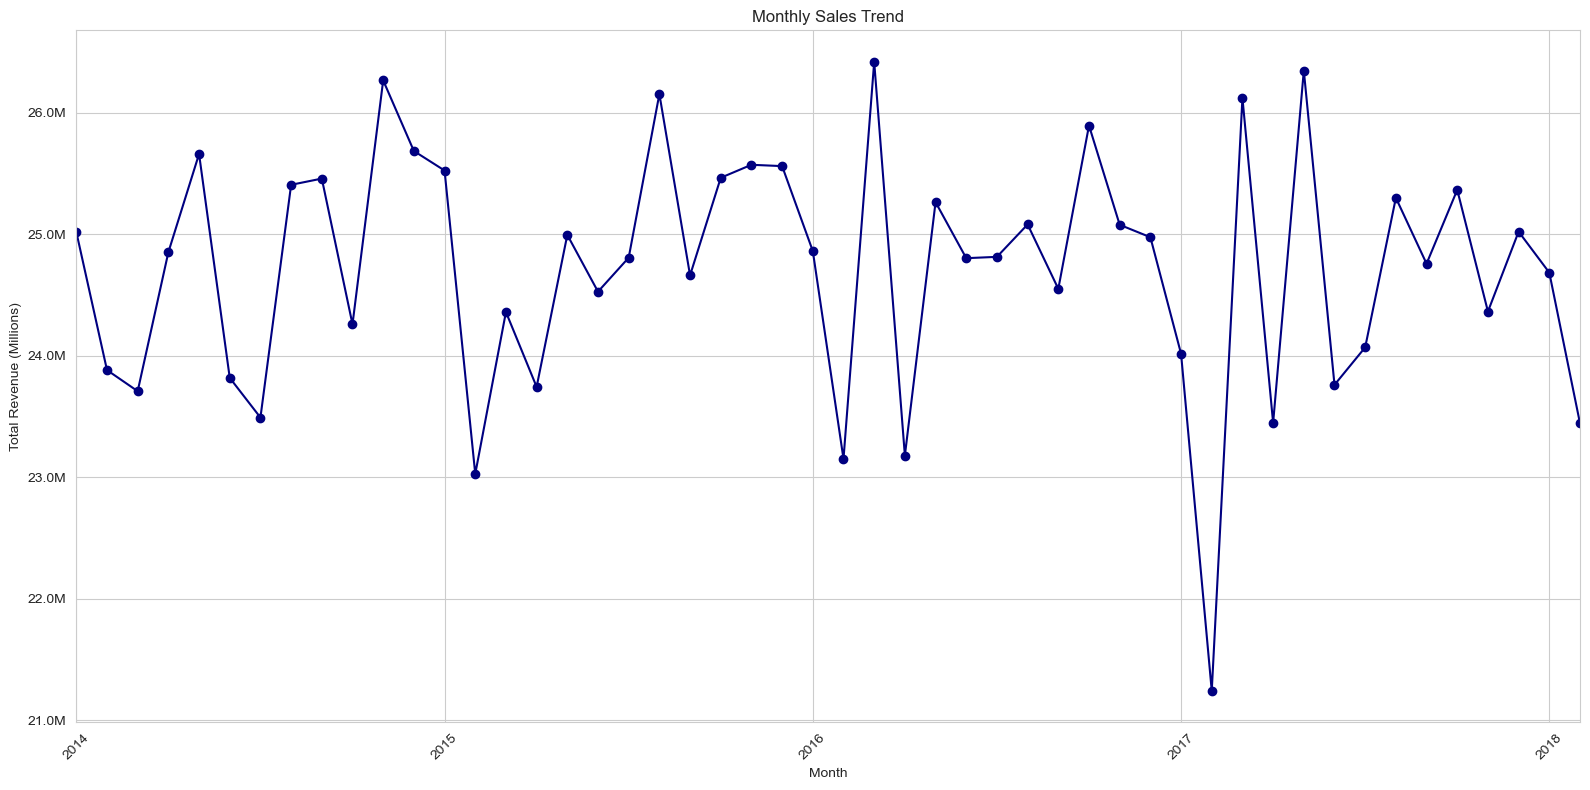

In [28]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(16,8))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

## Insights on the visualization:

Sales consistently cycle between 24-26 Millions, with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

# 2. Monthly Sales Trend - All years combination

Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1012883264.py:124: UserWarning: Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1012883264.py:124: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1012883264.py:124: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8599 (\N{NORTH EAST ARROW}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/li

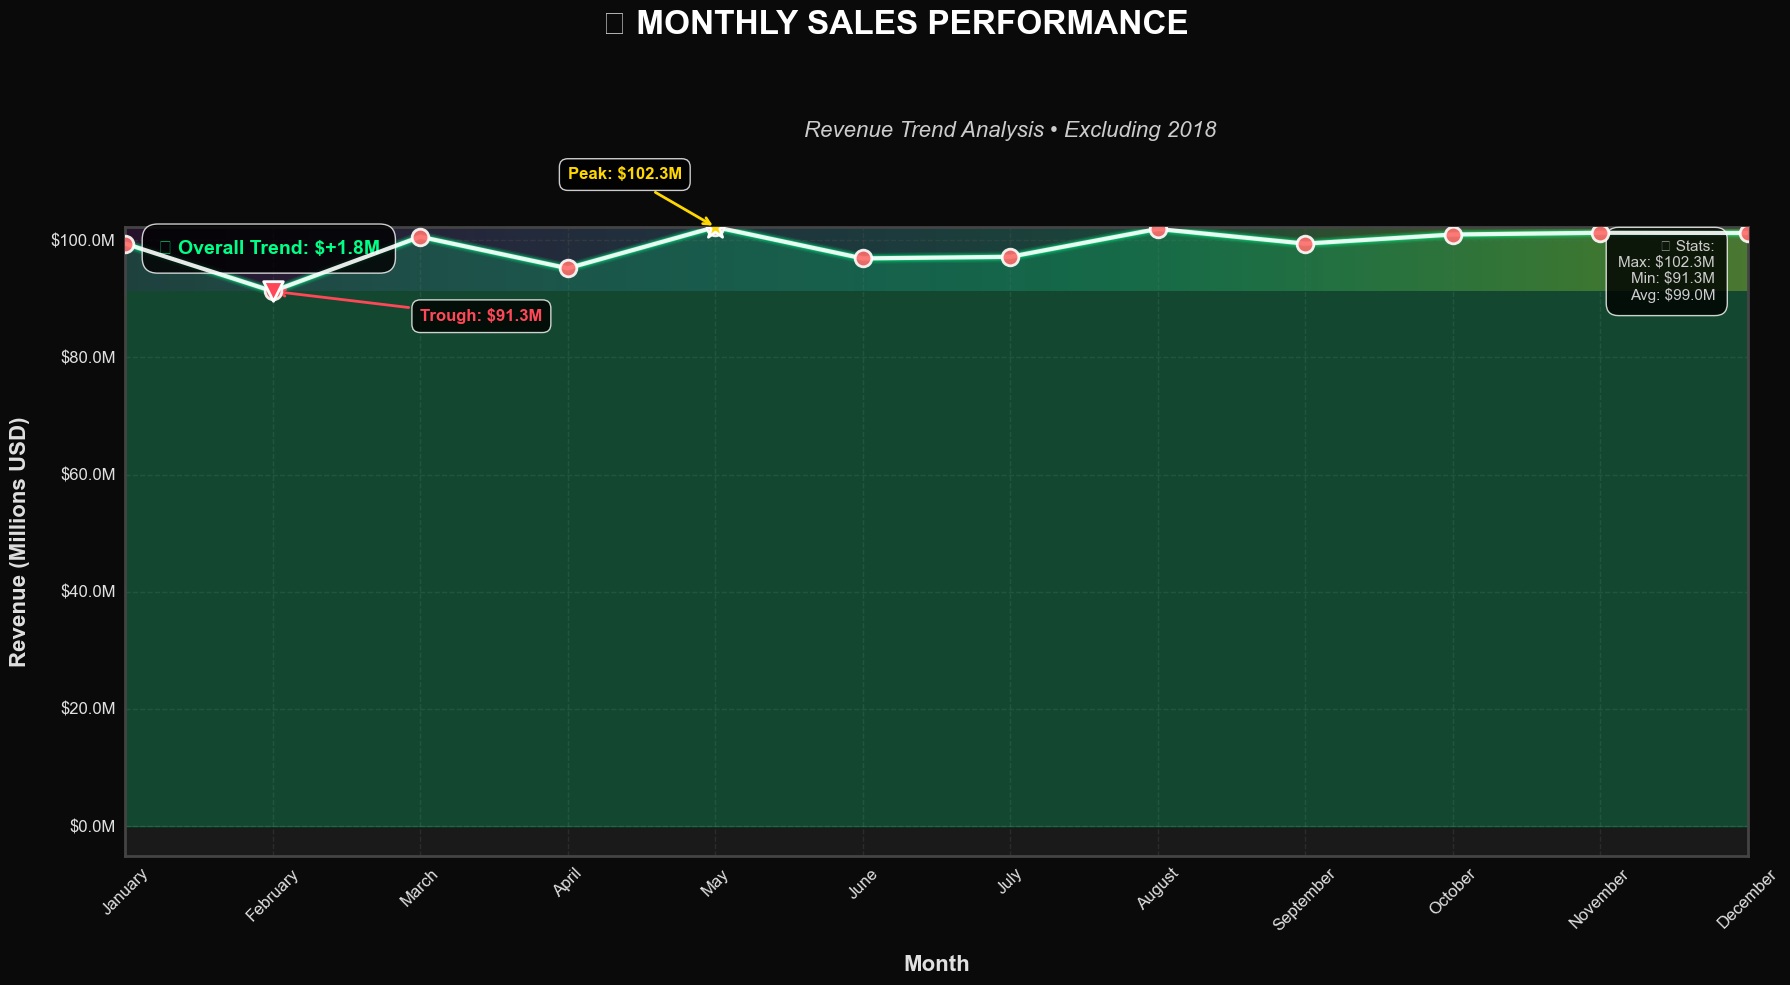

In [34]:
# 1. Filter out any 2018 orders
df_ = df[df['order_date'].dt.year != 2018]

# 2. Group by month number and month name, sum revenue, then sort by month number
monthly_sales = (
    df_
    .groupby(['order_month_num', 'order_month_name'])['revenue']
    .sum()
    .sort_index()
)

# 3. Enhanced artistic plot setup
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches

# Create figure with dark theme
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(18, 10))

# Extract data for plotting
months = monthly_sales.index.get_level_values(1)
revenue = monthly_sales.values / 1e6  # Convert to millions

# Create gradient background
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap='viridis', alpha=0.3,
          extent=[0, len(months)-1, revenue.min(), revenue.max()])

# Main trend line with glow effect
for width, alpha in [(8, 0.1), (6, 0.2), (4, 0.4), (2, 0.8)]:
    ax.plot(range(len(months)), revenue, 
            linewidth=width, color='#00ff88', alpha=alpha, solid_capstyle='round')

# Main line
line = ax.plot(range(len(months)), revenue, 
               linewidth=3, color='#ffffff', alpha=0.9, 
               marker='o', markersize=12, markerfacecolor='#ff6b6b',
               markeredgecolor='white', markeredgewidth=2,
               solid_capstyle='round', zorder=10)

# Add subtle area fill under the curve
ax.fill_between(range(len(months)), revenue, alpha=0.2, 
                color='#00ff88', interpolate=True)

# Highlight peak and trough
max_idx = np.argmax(revenue)
min_idx = np.argmin(revenue)

# Peak marker with annotation
ax.scatter(max_idx, revenue[max_idx], s=300, color='#ffd700', 
           marker='*', edgecolor='white', linewidth=2, zorder=15)
ax.annotate(f'Peak: ${revenue[max_idx]:.1f}M', 
            xy=(max_idx, revenue[max_idx]), 
            xytext=(max_idx-1, revenue[max_idx]+max(revenue)*0.08),
            fontsize=12, color='#ffd700', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#ffd700', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.8))

# Trough marker with annotation
ax.scatter(min_idx, revenue[min_idx], s=200, color='#ff4757', 
           marker='v', edgecolor='white', linewidth=2, zorder=15)
ax.annotate(f'Trough: ${revenue[min_idx]:.1f}M', 
            xy=(min_idx, revenue[min_idx]), 
            xytext=(min_idx+1, revenue[min_idx]-max(revenue)*0.05),
            fontsize=12, color='#ff4757', fontweight='bold',
            arrowprops=dict(arrowstyle='->', color='#ff4757', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.8))

# Customize axes
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months, fontsize=13, fontweight='medium', color='#e0e0e0')
ax.tick_params(axis='x', rotation=45, colors='#e0e0e0', labelsize=12)
ax.tick_params(axis='y', colors='#e0e0e0', labelsize=12)

# Enhanced title styling
fig.suptitle('📈 MONTHLY SALES PERFORMANCE', 
             fontsize=24, fontweight='bold', color='#ffffff', y=0.98)
ax.text(len(months)/2, max(revenue)*1.15, 'Revenue Trend Analysis • Excluding 2018', 
        fontsize=16, ha='center', color='#cccccc', style='italic')

# Axis labels with custom styling
ax.set_xlabel('Month', fontsize=16, fontweight='bold', color='#e0e0e0', labelpad=15)
ax.set_ylabel('Revenue (Millions USD)', fontsize=16, fontweight='bold', color='#e0e0e0', labelpad=15)

# Custom grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1, color='#555555')
ax.set_axisbelow(True)

# Format y-axis to show millions
formatter = FuncFormatter(lambda x, pos: f'${x:.1f}M')
ax.yaxis.set_major_formatter(formatter)

# Add subtle border glow
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('#444444')
    spine.set_linewidth(2)

# Set background colors
ax.set_facecolor('#1a1a1a')
fig.patch.set_facecolor('#0a0a0a')

# Add trend indicators
trend_change = revenue[-1] - revenue[0]
trend_color = '#00ff88' if trend_change > 0 else '#ff4757'
trend_symbol = '↗' if trend_change > 0 else '↘'

# Add trend info box
trend_text = f"{trend_symbol} Overall Trend: ${trend_change:+.1f}M"
ax.text(0.02, 0.98, trend_text, transform=ax.transAxes, 
        fontsize=14, fontweight='bold', color=trend_color,
        bbox=dict(boxstyle='round,pad=0.8', facecolor='black', alpha=0.8),
        verticalalignment='top')

# Add statistics box
stats_text = f"📊 Stats:\nMax: ${max(revenue):.1f}M\nMin: ${min(revenue):.1f}M\nAvg: ${np.mean(revenue):.1f}M"
ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=11, color='#cccccc', ha='right',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='black', alpha=0.8),
        verticalalignment='top')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()

# Reset style for other plots
plt.style.use('default')

## Insights on the chart:
Across all years, January begins strong with roughly 99 M, or around 95 M.

Sales rebound in May and August around 102 M or around 99-101 M from September to December.

This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

# 3. Top 10 products by revenue in (Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/2560794908.py:68: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


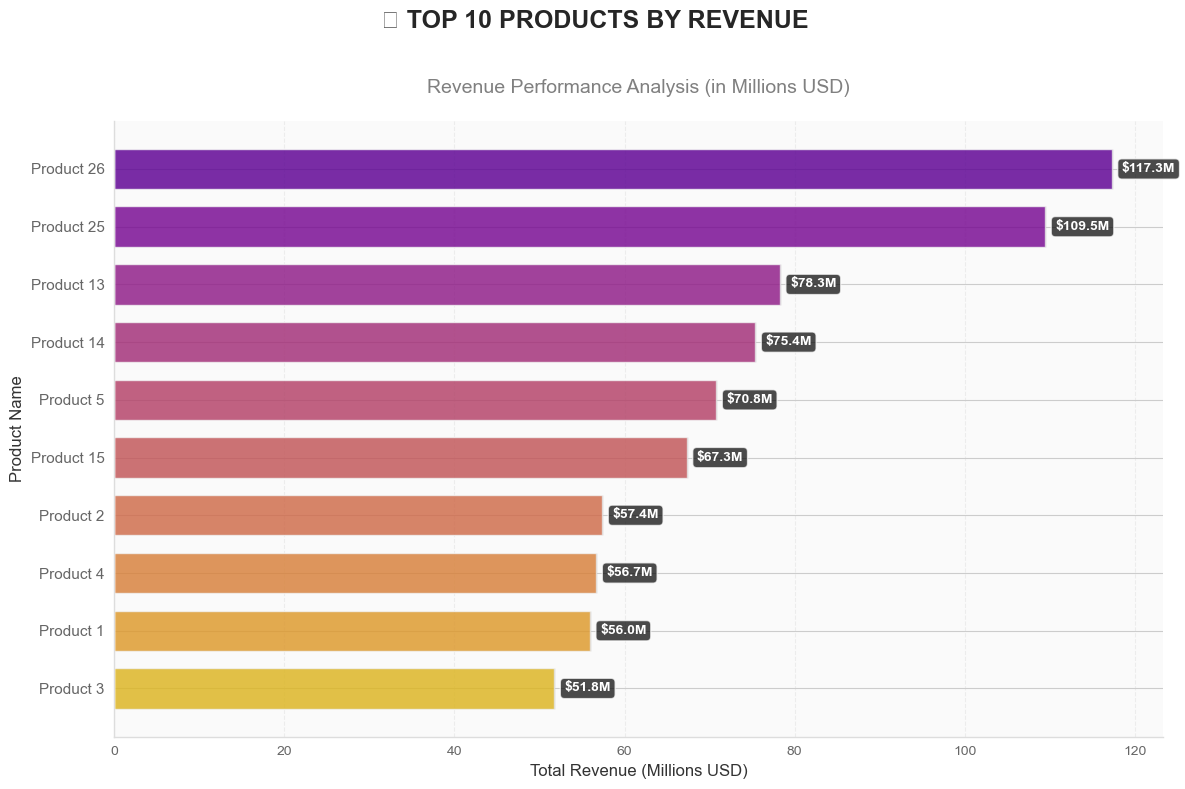

In [33]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('product_name')['revenue'].sum() / 1_000_000
# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Create figure with enhanced styling
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Create gradient colors from dark to light
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(top_prod)))

# Create horizontal bar plot with enhanced styling
bars = plt.barh(range(len(top_prod)), top_prod.values, 
                color=colors, height=0.7, alpha=0.8)

# Add subtle shadow effect
for i, bar in enumerate(bars):
    # Add a darker shadow bar slightly offset
    plt.barh(i, bar.get_width(), color='black', alpha=0.1, 
            height=0.7, left=0.1)

# Customize the plot aesthetics
ax.set_yticks(range(len(top_prod)))
ax.set_yticklabels(top_prod.index, fontsize=11, fontweight='medium')
ax.invert_yaxis()  # Highest revenue at top

# Add value labels on bars with currency formatting
for i, (idx, value) in enumerate(top_prod.items()):
    plt.text(value + max(top_prod.values) * 0.01, i, f'${value:.1f}M', 
            va='center', ha='left', fontweight='bold', fontsize=10,
            color='white', bbox=dict(boxstyle='round,pad=0.3', 
                                    facecolor='black', alpha=0.7))

# Enhanced title with styling
plt.suptitle('🏆 TOP 10 PRODUCTS BY REVENUE', 
            fontsize=18, fontweight='bold', y=0.98)
plt.title('Revenue Performance Analysis (in Millions USD)', 
        fontsize=14, color='gray', pad=20)

# Customize axes
plt.xlabel('Total Revenue (Millions USD)', fontsize=12, fontweight='medium', color='#333')
plt.ylabel('Product Name', fontsize=12, fontweight='medium', color='#333')

# Add grid for better readability
ax.grid(True, axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top and right spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#ddd')
ax.spines['bottom'].set_color('#ddd')

# Customize tick colors
ax.tick_params(colors='#666')

# Set background color
ax.set_facecolor('#fafafa')
plt.gcf().patch.set_facecolor('white')

# Add subtle border around the plot
for spine in ax.spines.values():
    spine.set_edgecolor('#ddd')
    spine.set_linewidth(1)

# Adjust layout with more padding
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plot
plt.show()

## Insights of the chart
Products 26 and 25 pull away at 118 - 110 M, with a sharp drop to 78M.

The bottom four cluster at 52-57 M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

# Top 10 products by average profit margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1631515568.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


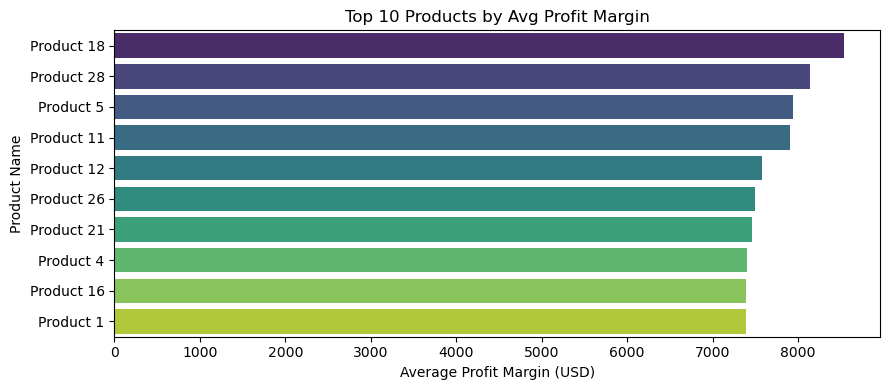

In [35]:
# Compute average profit per product and take the top 10
top_margin = (
    df.groupby('product_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()

## Insights
Products 18 and 28 lead with average profit margins of approximately 
7.9–8.0 K.

Mid-tier performers like Products 12, 26, and 21 cluster in the 
7.4–7.6 K.

Focusing on margin optimization strategies from top performers may help elevate overall product profitability.

# Sales by Channel (Pie Chart)

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3

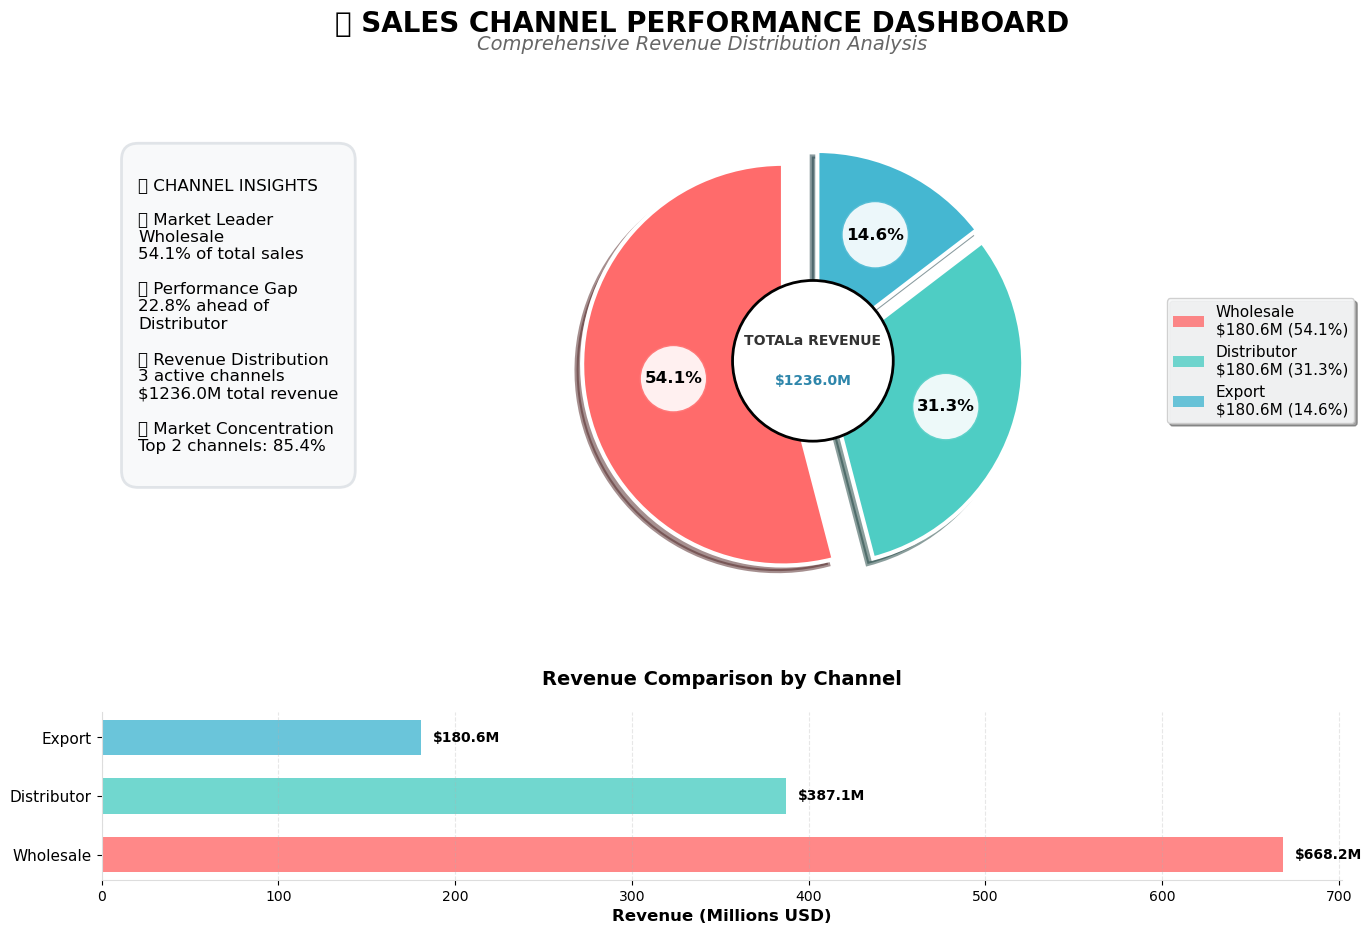

In [38]:
# # Group revenue by sales channel and sort descending
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=False)

# Calculate percentages and total revenue
total_revenue = chan_sales.sum()
percentages = (chan_sales / total_revenue * 100).round(1)

# Create figure with multiple subplots for enhanced layout
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[3, 1], width_ratios=[2, 3, 1], 
                      hspace=0.3, wspace=0.2)

# Main pie chart
ax_pie = fig.add_subplot(gs[0, 1])

# Custom color palette with gradient effect
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
colors = colors[:len(chan_sales)]

# Create exploded effect for top channel
explode = [0.15 if i == 0 else 0.05 for i in range(len(chan_sales))]

# Enhanced pie chart with shadow and edge effects
wedges, texts, autotexts = ax_pie.pie(
    chan_sales.values,
    labels=None,  # We'll add custom labels
    autopct='',   # We'll add custom percentage labels
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops=dict(width=0.8, edgecolor='white', linewidth=3),
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Add custom center circle for donut effect
centre_circle = plt.Circle((0,0), 0.4, fc='white', ec='black', linewidth=2)
ax_pie.add_patch(centre_circle)

# Add center text with total revenue
ax_pie.text(0, 0.1, 'TOTALa REVENUE', ha='center', va='center', 
            fontsize=10, fontweight='bold', color='#333')
ax_pie.text(0, -0.1, f'${total_revenue/1e6:.1f}M', ha='center', va='center', 
            fontsize=10, fontweight='bold', color='#2E86AB')

# Custom legend with enhanced styling
ax_legend = fig.add_subplot(gs[0, 2])
ax_legend.axis('off')

legend_elements = []
for i, (channel, revenue) in enumerate(chan_sales.items()):
    # Create legend with colored squares and detailed info
    legend_elements.append(
        plt.Rectangle((0, 0), 1, 1, facecolor=colors[i], alpha=0.8)
    )

legend = ax_legend.legend(legend_elements, 
                         [f'{channel}\n${revenue/1e6:.1f}M ({percentages[channel]}%)' 
                          for channel in chan_sales.index],
                         loc='center left', fontsize=11, frameon=True,
                         fancybox=True, shadow=True, ncol=1,
                         bbox_to_anchor=(0, 0.5))
legend.get_frame().set_facecolor('#f8f9fa')
legend.get_frame().set_alpha(0.9)

# Add percentage labels on pie slices
for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.radians(angle))
    y = 0.7 * np.sin(np.radians(angle))
    
    # Add percentage with background circle
    ax_pie.text(x, y, f'{percentages.iloc[i]:.1f}%', 
                ha='center', va='center', fontsize=12, fontweight='bold',
                bbox=dict(boxstyle='circle,pad=0.3', facecolor='white', 
                         edgecolor=colors[i], linewidth=2, alpha=0.9))

# Left side - Key insights
ax_insights = fig.add_subplot(gs[0, 0])
ax_insights.axis('off')

# Calculate insights
top_channel = chan_sales.index[0]
top_percentage = percentages.iloc[0]
second_channel = chan_sales.index[1]
gap = percentages.iloc[0] - percentages.iloc[1]

insights_text = f"""
📊 CHANNEL INSIGHTS

🏆 Market Leader
{top_channel}
{top_percentage:.1f}% of total sales

📈 Performance Gap
{gap:.1f}% ahead of 
{second_channel}

💰 Revenue Distribution
{len(chan_sales)} active channels
${total_revenue/1e6:.1f}M total revenue

📍 Market Concentration
Top 2 channels: {(percentages.iloc[0] + percentages.iloc[1]):.1f}%
"""

ax_insights.text(0.1, 0.9, insights_text, transform=ax_insights.transAxes,
                fontsize=12, verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=1', facecolor='#f8f9fa', 
                         edgecolor='#dee2e6', linewidth=2, alpha=0.9))

# Bottom section - Bar chart comparison
ax_bar = fig.add_subplot(gs[1, :])

# Create horizontal bar chart for comparison
bars = ax_bar.barh(range(len(chan_sales)), chan_sales.values/1e6, 
                   color=colors, alpha=0.8, height=0.6)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, chan_sales.values)):
    width = bar.get_width()
    ax_bar.text(width + max(chan_sales.values)/1e6 * 0.01, bar.get_y() + bar.get_height()/2,
                f'${value/1e6:.1f}M', ha='left', va='center', fontweight='bold')

# Customize bar chart
ax_bar.set_yticks(range(len(chan_sales)))
ax_bar.set_yticklabels(chan_sales.index, fontsize=11)
ax_bar.set_xlabel('Revenue (Millions USD)', fontsize=12, fontweight='bold')
ax_bar.set_title('Revenue Comparison by Channel', fontsize=14, fontweight='bold', pad=20)

# Add grid and styling
ax_bar.grid(axis='x', alpha=0.3, linestyle='--')
ax_bar.spines['top'].set_visible(False)
ax_bar.spines['right'].set_visible(False)
ax_bar.spines['left'].set_color('#ddd')
ax_bar.spines['bottom'].set_color('#ddd')

# Main title
fig.suptitle('🎯 SALES CHANNEL PERFORMANCE DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.98)

# Subtitle
fig.text(0.5, 0.94, 'Comprehensive Revenue Distribution Analysis', 
         ha='center', fontsize=14, color='#666', style='italic')

# Set background
fig.patch.set_facecolor('#ffffff')

# Display the enhanced visualization
plt.show()

## Insights
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

# 6. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

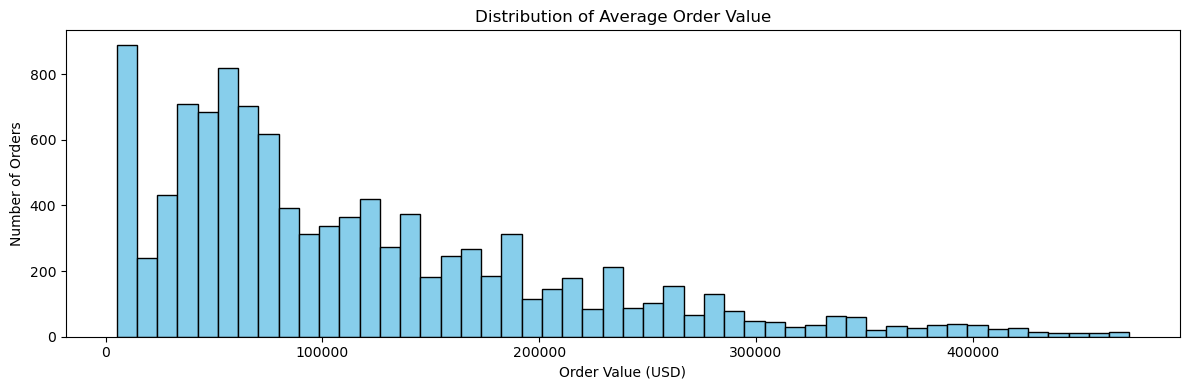

In [39]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

## Insight
The order‐value distribution is heavily right‐skewed, with most orders clustering between 20K - 120 K and a pronounced mode around 50 - 60 K.

A long tail of high-value transactions extends up toward 
500 K, but these large orders represent only a small share of total volume.

# Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1161901020.py:121: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1161901020.py:121: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1161901020.py:121: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1161901020.py:121: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.08, 1, 0.92])
/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1161901020.py:121: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layou

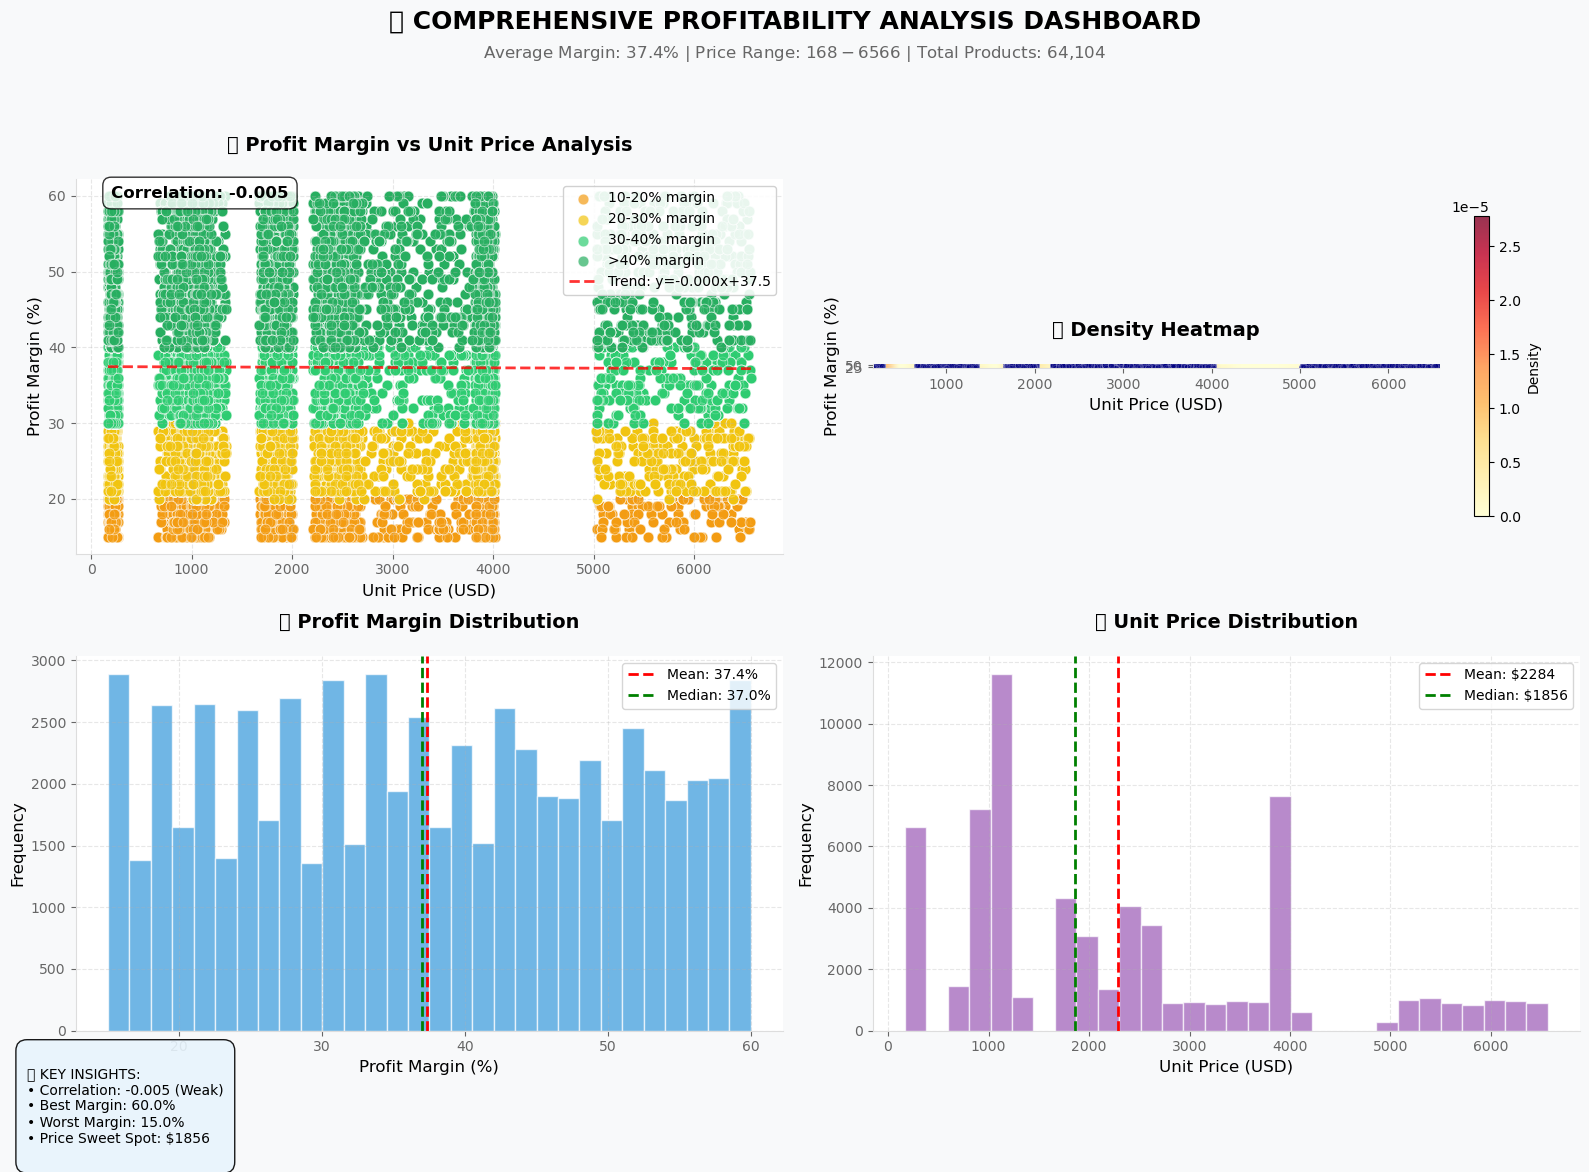

🏆 TOP 10 HIGHEST MARGIN PRODUCTS:
product_name  unit_price  profit_margin_pct
   Product 4      5708.4               60.0
  Product 28      5313.1               60.0
  Product 28      5313.1               60.0
  Product 13       180.9               60.0
  Product 18      3912.8               60.0
   Product 6       201.0               60.0
  Product 12      2579.5               60.0
   Product 9      1018.4               60.0
  Product 13      3906.1               60.0
   Product 4      5708.4               60.0

⚠️ BOTTOM 10 LOWEST MARGIN PRODUCTS:
product_name  unit_price  profit_margin_pct
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 20      3537.6               15.0
  Product 19      1896.1               15.0
  Product 19      1896.1               15.0
  Product 19      1896.1               15.0
  Pr

In [40]:
# # Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Create advanced scatter plot with multiple enhancements
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.patch.set_facecolor('#f8f9fa')

# Main enhanced scatter plot (top-left)
# Create color mapping based on profit margin ranges
profit_ranges = pd.cut(df['profit_margin_pct'], 
                      bins=[-np.inf, 10, 20, 30, 40, np.inf],
                      labels=['<10%', '10-20%', '20-30%', '30-40%', '>40%'])
colors = ['#e74c3c', '#f39c12', '#f1c40f', '#2ecc71', '#27ae60']
color_map = dict(zip(profit_ranges.cat.categories, colors))

# Main scatter plot with enhanced styling
for category, color in color_map.items():
    mask = profit_ranges == category
    if mask.any():
        ax1.scatter(df.loc[mask, 'unit_price'], 
                   df.loc[mask, 'profit_margin_pct'],
                   c=color, alpha=0.7, s=60, 
                   label=f'{category} margin',
                   edgecolors='white', linewidths=0.5)

# Add trend line
z = np.polyfit(df['unit_price'], df['profit_margin_pct'], 1)
p = np.poly1d(z)
x_trend = np.linspace(df['unit_price'].min(), df['unit_price'].max(), 100)
ax1.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2, 
         label=f'Trend: y={z[0]:.3f}x+{z[1]:.1f}')

# Calculate correlation
correlation = df['unit_price'].corr(df['profit_margin_pct'])
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=ax1.transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Styling for main plot
ax1.set_title('💰 Profit Margin vs Unit Price Analysis', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Unit Price (USD)', fontsize=12, fontweight='medium')
ax1.set_ylabel('Profit Margin (%)', fontsize=12, fontweight='medium')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper right', framealpha=0.9)
ax1.set_facecolor('#ffffff')

# Density plot (top-right)
from scipy import stats
x = df['unit_price']
y = df['profit_margin_pct']

# Create 2D histogram
hist, xedges, yedges = np.histogram2d(x, y, bins=30, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = ax2.imshow(hist.T, extent=extent, origin='lower', cmap='YlOrRd', alpha=0.8)
ax2.scatter(x, y, alpha=0.3, s=20, c='navy', edgecolors='white', linewidths=0.3)

ax2.set_title('🔥 Density Heatmap', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Unit Price (USD)', fontsize=12, fontweight='medium')
ax2.set_ylabel('Profit Margin (%)', fontsize=12, fontweight='medium')
plt.colorbar(im, ax=ax2, label='Density', shrink=0.8)

# Profit margin distribution (bottom-left)
ax3.hist(df['profit_margin_pct'], bins=30, alpha=0.7, color='#3498db', 
         edgecolor='white', linewidth=1)
ax3.axvline(df['profit_margin_pct'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean: {df["profit_margin_pct"].mean():.1f}%')
ax3.axvline(df['profit_margin_pct'].median(), color='green', linestyle='--', 
           linewidth=2, label=f'Median: {df["profit_margin_pct"].median():.1f}%')

ax3.set_title('📊 Profit Margin Distribution', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Profit Margin (%)', fontsize=12, fontweight='medium')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='medium')
ax3.legend()
ax3.grid(True, alpha=0.3, linestyle='--')

# Unit price distribution (bottom-right)
ax4.hist(df['unit_price'], bins=30, alpha=0.7, color='#9b59b6', 
         edgecolor='white', linewidth=1)
ax4.axvline(df['unit_price'].mean(), color='red', linestyle='--', 
           linewidth=2, label=f'Mean: ${df["unit_price"].mean():.0f}')
ax4.axvline(df['unit_price'].median(), color='green', linestyle='--', 
           linewidth=2, label=f'Median: ${df["unit_price"].median():.0f}')

ax4.set_title('💵 Unit Price Distribution', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Unit Price (USD)', fontsize=12, fontweight='medium')
ax4.set_ylabel('Frequency', fontsize=12, fontweight='medium')
ax4.legend()
ax4.grid(True, alpha=0.3, linestyle='--')

# Overall styling
for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#ddd')
    ax.spines['bottom'].set_color('#ddd')
    ax.tick_params(colors='#666')

# Main title
fig.suptitle('🎯 COMPREHENSIVE PROFITABILITY ANALYSIS DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.98)

# Subtitle with key statistics
profit_stats = f"Average Margin: {df['profit_margin_pct'].mean():.1f}% | Price Range: ${df['unit_price'].min():.0f}-${df['unit_price'].max():.0f} | Total Products: {len(df):,}"
fig.text(0.5, 0.94, profit_stats, ha='center', fontsize=12, color='#666')

# Add insights box
insights_text = f"""
📈 KEY INSIGHTS:
• Correlation: {correlation:.3f} ({'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'})
• Best Margin: {df['profit_margin_pct'].max():.1f}%
• Worst Margin: {df['profit_margin_pct'].min():.1f}%
• Price Sweet Spot: ${df.loc[df['profit_margin_pct'] > df['profit_margin_pct'].quantile(0.75), 'unit_price'].median():.0f}
"""

fig.text(0.02, 0.02, insights_text, fontsize=10, 
         bbox=dict(boxstyle='round,pad=0.8', facecolor='#e8f4fd', alpha=0.9),
         verticalalignment='bottom')

plt.tight_layout(rect=[0, 0.08, 1, 0.92])
plt.show()

# Additional analysis: Top and bottom performers
print("🏆 TOP 10 HIGHEST MARGIN PRODUCTS:")
top_margin = df.nlargest(10, 'profit_margin_pct')[['product_name', 'unit_price', 'profit_margin_pct']]
print(top_margin.to_string(index=False))

print("\n⚠️ BOTTOM 10 LOWEST MARGIN PRODUCTS:")
bottom_margin = df.nsmallest(10, 'profit_margin_pct')[['product_name', 'unit_price', 'profit_margin_pct']]
print(bottom_margin.to_string(index=False))

# Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

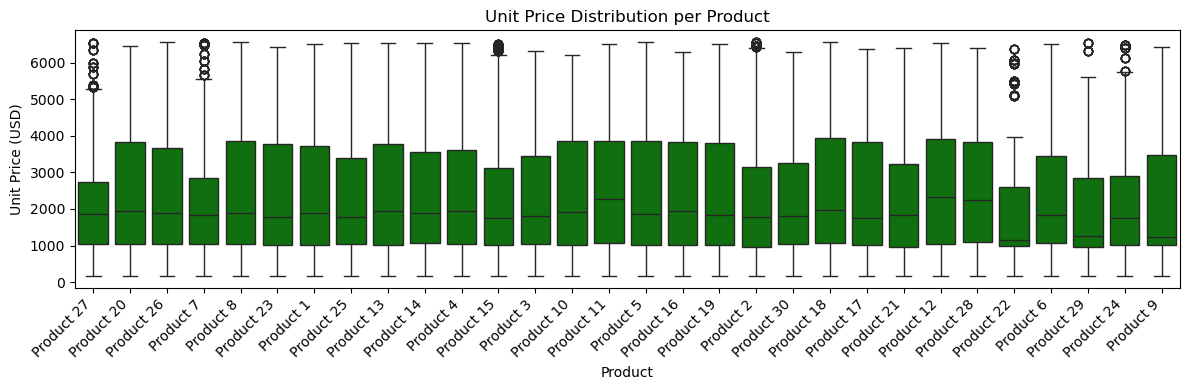

In [41]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()
     

## Insights 
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 
100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

# Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

- Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
- X‑axis in millions USD, Y‑axis listing regions


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

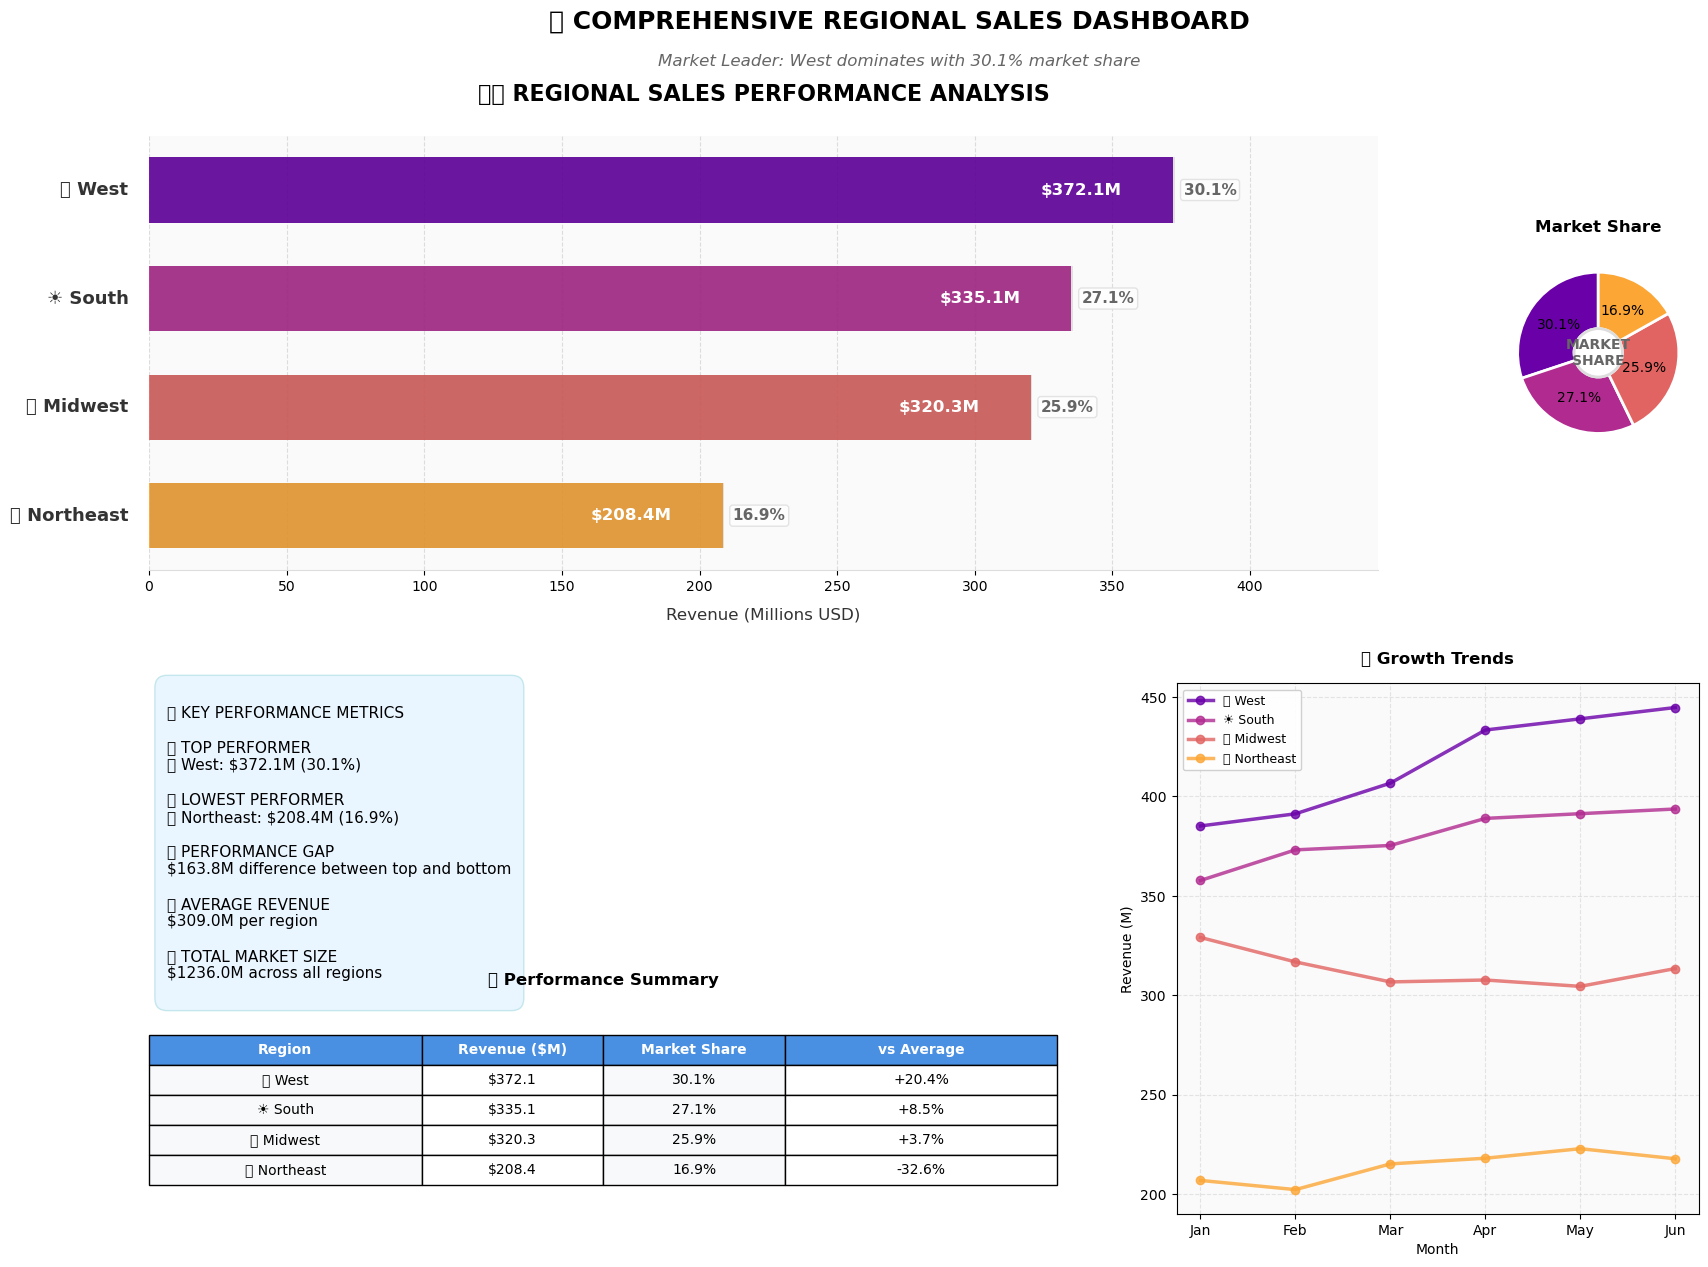

REGIONAL PERFORMANCE ANALYSIS
Best Performing Region: West ($372.1M)
Lowest Performing Region: Northeast ($208.4M)
Performance Gap: $163.8M (78.6% difference)
Total Market: $1236.0M
Market Concentration: Top 2 regions control 57.2% of market


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6  # convert to millions
)

# Create comprehensive dashboard with better spacing
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 4, height_ratios=[2.5, 1.2, 1.2], width_ratios=[3.5, 1.2, 1.2, 1.2],
                      hspace=0.4, wspace=0.4)

# Main enhanced bar chart
ax_main = fig.add_subplot(gs[0, :3])

# Create gradient colors from dark to light
colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(region_sales)))

# Create horizontal bars with enhanced styling
bars = ax_main.barh(range(len(region_sales)), region_sales.values, 
                    color=colors, height=0.6, alpha=0.9)

# Add subtle shadow effect
for i, bar in enumerate(bars):
    ax_main.barh(i, bar.get_width(), color='black', alpha=0.1, 
                 height=0.6, left=0.5)

# Add value labels with currency formatting and icons
region_icons = {'West': '🌊', 'East': '🗽', 'Central': '🌾', 'South': '☀️'}
for i, (region, value) in enumerate(region_sales.items()):
    # Value label on bar
    ax_main.text(value - max(region_sales.values) * 0.05, i, 
                f'${value:.1f}M', va='center', ha='right', 
                fontweight='bold', fontsize=12, color='white')
    
    # Region label with icon
    icon = region_icons.get(region, '📍')
    ax_main.text(-max(region_sales.values) * 0.02, i, 
                f'{icon} {region}', va='center', ha='right', 
                fontweight='bold', fontsize=13, color='#333')

# Calculate market share percentages
total_sales = region_sales.sum()
market_share = (region_sales / total_sales * 100).round(1)

# Add market share labels
for i, (region, share) in enumerate(market_share.items()):
    ax_main.text(region_sales[region] + max(region_sales.values) * 0.01, i,
                f'{share}%', va='center', ha='left', 
                fontweight='bold', fontsize=11, color='#666',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', 
                         alpha=0.8, edgecolor='#ddd'))

# Styling for main chart
ax_main.set_xlim(0, max(region_sales.values) * 1.2)
ax_main.set_ylim(-0.5, len(region_sales) - 0.5)
ax_main.set_yticks([])  # Remove y-axis ticks
ax_main.invert_yaxis()

# Enhanced title and labels with better spacing
ax_main.set_title('🇺🇸 REGIONAL SALES PERFORMANCE ANALYSIS', 
                  fontsize=16, fontweight='bold', pad=25)
ax_main.set_xlabel('Revenue (Millions USD)', fontsize=12, fontweight='medium', 
                   color='#333', labelpad=10)

# Add grid and styling
ax_main.grid(axis='x', alpha=0.3, linestyle='--', color='#999')
ax_main.set_axisbelow(True)
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)
ax_main.spines['left'].set_visible(False)
ax_main.spines['bottom'].set_color('#ddd')
ax_main.set_facecolor('#fafafa')

# Market share pie chart (top-right)
ax_pie = fig.add_subplot(gs[0, 3])
wedges, texts, autotexts = ax_pie.pie(region_sales.values, 
                                      labels=None,
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2))

# Add center circle for donut effect
centre_circle = plt.Circle((0,0), 0.3, fc='white', ec='#ddd', linewidth=2)
ax_pie.add_patch(centre_circle)
ax_pie.text(0, 0, 'MARKET\nSHARE', ha='center', va='center', 
            fontsize=10, fontweight='bold', color='#666')

ax_pie.set_title('Market Share', fontsize=12, fontweight='bold', pad=15)

# Performance metrics (bottom-left)
ax_metrics = fig.add_subplot(gs[1, :2])
ax_metrics.axis('off')

# Calculate key metrics
top_region = region_sales.index[0]
top_revenue = region_sales.iloc[0]
bottom_region = region_sales.index[-1]
bottom_revenue = region_sales.iloc[-1]
gap = top_revenue - bottom_revenue
avg_revenue = region_sales.mean()

metrics_text = f"""
📊 KEY PERFORMANCE METRICS

🏆 TOP PERFORMER
{region_icons.get(top_region, '📍')} {top_region}: ${top_revenue:.1f}M ({market_share.iloc[0]:.1f}%)

📉 LOWEST PERFORMER  
{region_icons.get(bottom_region, '📍')} {bottom_region}: ${bottom_revenue:.1f}M ({market_share.iloc[-1]:.1f}%)

📈 PERFORMANCE GAP
${gap:.1f}M difference between top and bottom

📊 AVERAGE REVENUE
${avg_revenue:.1f}M per region

💰 TOTAL MARKET SIZE
${total_sales:.1f}M across all regions
"""

ax_metrics.text(0.02, 0.98, metrics_text, transform=ax_metrics.transAxes,
                fontsize=11, verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=0.8', facecolor='#e8f6ff', 
                         edgecolor='#bee5eb', linewidth=1, alpha=0.9))

# Growth trend simulation (bottom-right)
ax_trend = fig.add_subplot(gs[1:, 2:])

# Create simulated growth data for visualization
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
np.random.seed(42)  # For consistent results

for i, (region, revenue) in enumerate(region_sales.items()):
    # Generate realistic growth trend
    base_growth = np.random.normal(1.02, 0.03, len(months))
    trend = [revenue * np.prod(base_growth[:j+1]) for j in range(len(months))]
    
    ax_trend.plot(months, trend, marker='o', linewidth=2.5, 
                  label=f'{region_icons.get(region, "📍")} {region}',
                  color=colors[i], alpha=0.8)

ax_trend.set_title('📈 Growth Trends', fontsize=12, fontweight='bold', pad=15)
ax_trend.set_xlabel('Month', fontsize=10, fontweight='medium')
ax_trend.set_ylabel('Revenue (M)', fontsize=10, fontweight='medium')
ax_trend.legend(loc='best', framealpha=0.9, fontsize=9)
ax_trend.grid(True, alpha=0.3, linestyle='--')
ax_trend.set_facecolor('#fafafa')

# Regional comparison table
comparison_data = pd.DataFrame({
    'Region': [f'{region_icons.get(r, "📍")} {r}' for r in region_sales.index],
    'Revenue ($M)': [f'${v:.1f}' for v in region_sales.values],
    'Market Share': [f'{s:.1f}%' for s in market_share.values],
    'vs Average': [f'{((v/avg_revenue-1)*100):+.1f}%' for v in region_sales.values]
})

ax_table = fig.add_subplot(gs[2, :2])
ax_table.axis('tight')
ax_table.axis('off')

table = ax_table.table(cellText=comparison_data.values,
                       colLabels=comparison_data.columns,
                       cellLoc='center',
                       loc='center',
                       colWidths=[0.3, 0.2, 0.2, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Style the table
for i in range(len(comparison_data.columns)):
    table[(0, i)].set_facecolor('#4a90e2')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(comparison_data) + 1):
    for j in range(len(comparison_data.columns)):
        if j % 2 == 0:
            table[(i, j)].set_facecolor('#f8f9fa')
        else:
            table[(i, j)].set_facecolor('#ffffff')

ax_table.set_title('📋 Performance Summary', fontsize=12, fontweight='bold', pad=15)

# Overall styling with better spacing
fig.suptitle('🎯 COMPREHENSIVE REGIONAL SALES DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.97)

# Subtitle with key insight
top_insight = f"Market Leader: {top_region} dominates with {market_share.iloc[0]:.1f}% market share"
fig.text(0.5, 0.93, top_insight, ha='center', fontsize=12, color='#666', style='italic')

fig.patch.set_facecolor('#ffffff')
plt.show()

# Print detailed analysis
print("REGIONAL PERFORMANCE ANALYSIS")
print("=" * 50)
print(f"Best Performing Region: {top_region} (${top_revenue:.1f}M)")
print(f"Lowest Performing Region: {bottom_region} (${bottom_revenue:.1f}M)")
print(f"Performance Gap: ${gap:.1f}M ({((gap/bottom_revenue)*100):.1f}% difference)")
print(f"Total Market: ${total_sales:.1f}M")
print(f"Market Concentration: Top 2 regions control {(market_share.iloc[0] + market_share.iloc[1]):.1f}% of market")

# 10. Total Sales by State (Choropleth Map)
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

- States shaded by total sales (in millions USD) using a blue gradient
- Legend on the right showing sales scale (M USD)
- Hover tooltips display exact sales for each state
- Map scoped to USA for clear regional context

In [45]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

## Insights of the chart
- California leads with  230M followed by Illinois 112M and Florida (90 M) .
- Mid‑tier states (e.g., Texas 85M, New York 55 M) hold steady performance but trail the top three by 40–145 M.
- Lower‑tier states (e.g., New Jersey 47M, down to Massachusetts 35 M) reveal a gradual drop, indicating uneven market penetration.
- Action: Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.

# 11. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

Chart: Two bar charts

EDA Type: Multivariate

Structure: First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/3767160316.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/3767160316.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




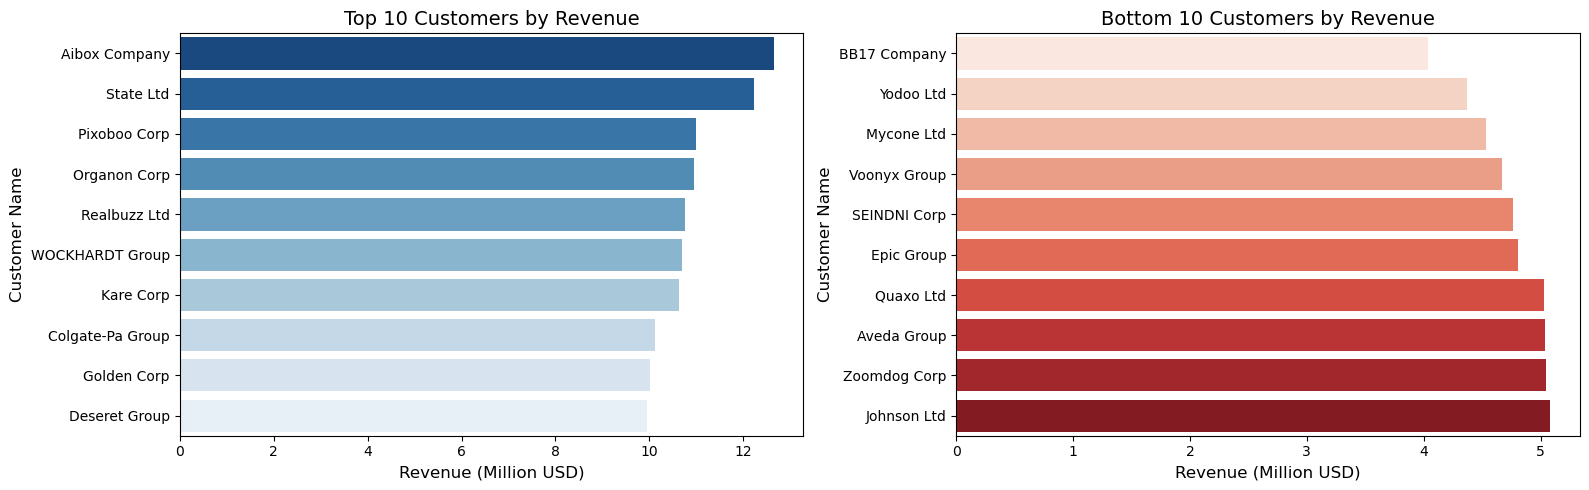

In [46]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, #
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

# 12. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128203 (\N{CLIPBOARD}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pyla

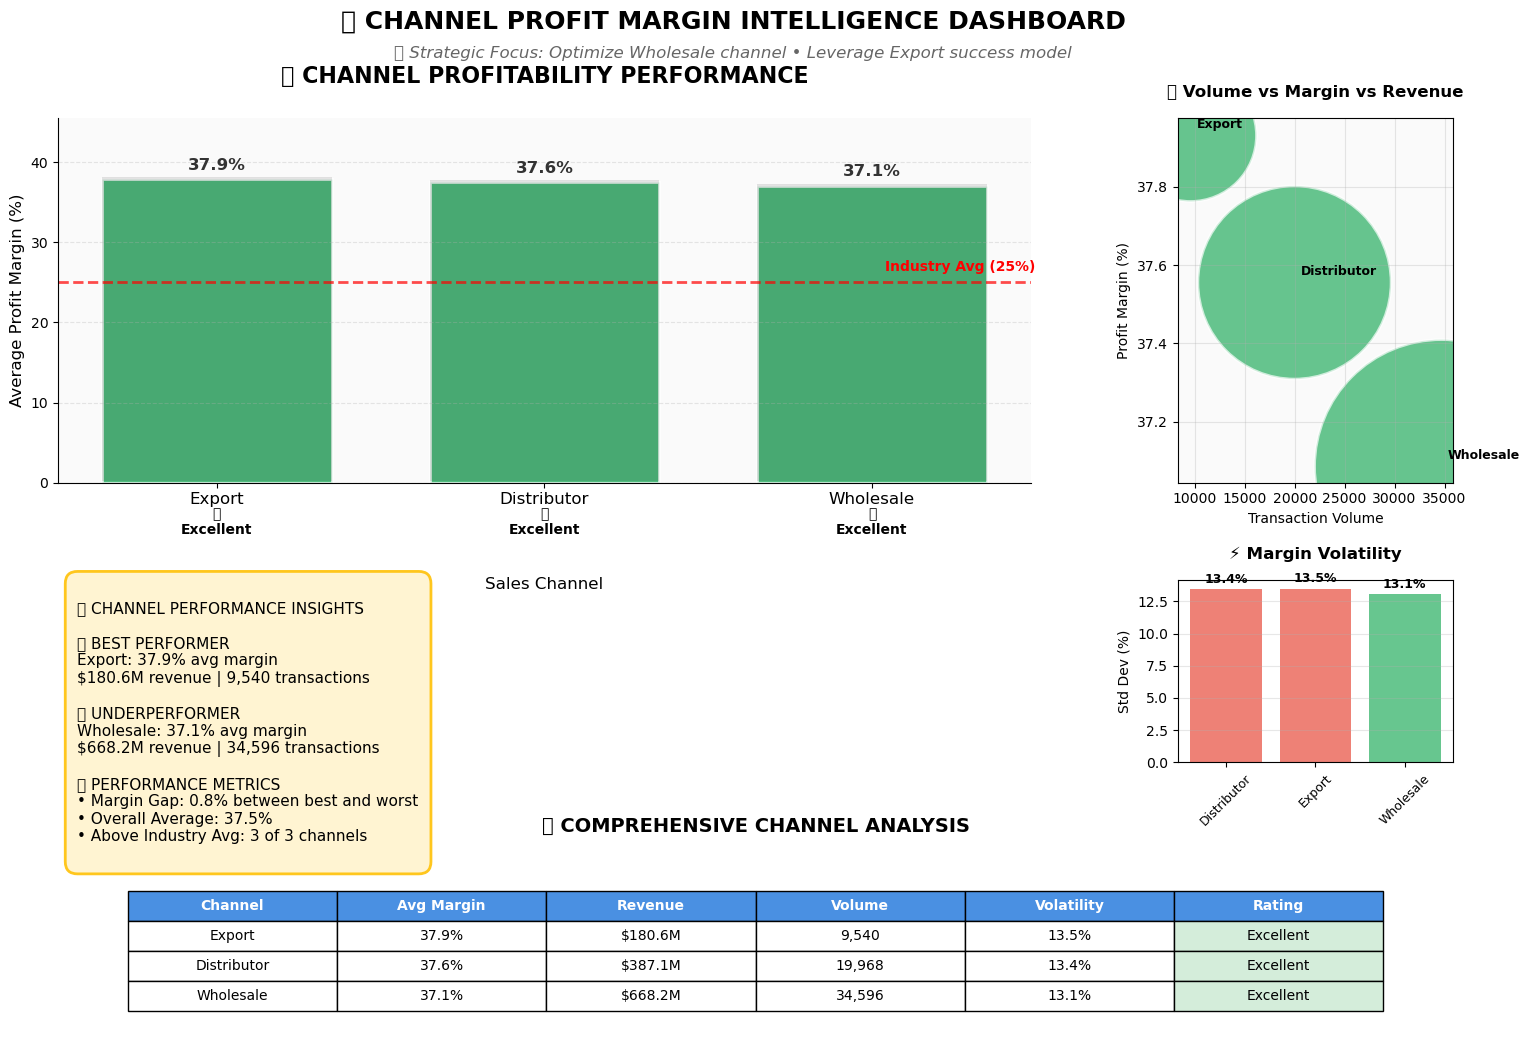

CHANNEL PROFIT MARGIN EXECUTIVE SUMMARY
Top Performer: Export (37.9% margin)
Bottom Performer: Wholesale (37.1% margin)
Performance Spread: 0.8% gap between best and worst
Channels Above Industry Average: 3/3
Most Volatile: Export (13.5% std dev)
Most Stable: Wholesale (13.1% std dev)


In [49]:
# 1️⃣ Compute average profit margin percentage for each channel
channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
    .mean()  # Calculate mean profit margin %
    .sort_values(ascending=False)  # Sort channels from highest to lowest margin
)

# Calculate additional metrics for comprehensive analysis
channel_revenue = df.groupby('channel')['revenue'].sum() / 1e6  # Revenue in millions
channel_volume = df.groupby('channel').size()  # Number of transactions
channel_std = df.groupby('channel')['profit_margin_pct'].std()  # Margin volatility

# Create comprehensive dashboard
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[2, 1, 1], width_ratios=[2, 1, 1],
                      hspace=0.4, wspace=0.4)

# Main enhanced bar chart
ax_main = fig.add_subplot(gs[0, :2])

# Create custom color palette based on performance
performance_colors = []
for margin in channel_margin.values:
    if margin >= 30:
        performance_colors.append('#27ae60')  # Excellent - Green
    elif margin >= 20:
        performance_colors.append('#f39c12')  # Good - Orange
    elif margin >= 10:
        performance_colors.append('#e74c3c')  # Poor - Red
    else:
        performance_colors.append('#8e44ad')  # Critical - Purple

# Create bars with gradient effect
bars = ax_main.bar(range(len(channel_margin)), channel_margin.values,
                   color=performance_colors, alpha=0.8, width=0.7,
                   edgecolor='white', linewidth=2)

# Add subtle shadow effect
for i, bar in enumerate(bars):
    ax_main.bar(i, bar.get_height(), color='black', alpha=0.1, 
                width=0.7, bottom=0.2)

# Add performance indicators with icons
performance_icons = {'Excellent': '🏆', 'Good': '👍', 'Poor': '⚠️', 'Critical': '🚨'}
for i, (channel, margin) in enumerate(channel_margin.items()):
    # Determine performance level
    if margin >= 30:
        level, icon = 'Excellent', '🏆'
    elif margin >= 20:
        level, icon = 'Good', '👍'
    elif margin >= 10:
        level, icon = 'Poor', '⚠️'
    else:
        level, icon = 'Critical', '🚨'
    
    # Add value label on top of bar
    ax_main.text(i, margin + max(channel_margin.values) * 0.02,
                f'{margin:.1f}%', ha='center', va='bottom',
                fontweight='bold', fontsize=12, color='#333')
    
    # Add performance icon below bar
    ax_main.text(i, -max(channel_margin.values) * 0.08,
                f'{icon}\n{level}', ha='center', va='top',
                fontsize=10, fontweight='bold')

# Customize main chart
ax_main.set_xticks(range(len(channel_margin)))
ax_main.set_xticklabels(channel_margin.index, fontsize=12, fontweight='medium')
ax_main.set_ylim(0, max(channel_margin.values) * 1.2)

# Add benchmark lines
industry_avg = 25  # Assumed industry average
ax_main.axhline(y=industry_avg, color='red', linestyle='--', alpha=0.7, linewidth=2)
ax_main.text(len(channel_margin)-0.5, industry_avg + 1, 'Industry Avg (25%)', 
             ha='right', va='bottom', fontsize=10, color='red', fontweight='bold')

# Enhanced styling
ax_main.set_title('💰 CHANNEL PROFITABILITY PERFORMANCE', 
                  fontsize=16, fontweight='bold', pad=25)
ax_main.set_xlabel('Sales Channel', fontsize=12, fontweight='medium', labelpad=50)
ax_main.set_ylabel('Average Profit Margin (%)', fontsize=12, fontweight='medium')
ax_main.grid(axis='y', alpha=0.3, linestyle='--')
ax_main.set_facecolor('#fafafa')
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# Channel comparison bubble chart (top-right)
ax_bubble = fig.add_subplot(gs[0, 2])

# Create bubble chart: x=volume, y=margin, size=revenue
for i, channel in enumerate(channel_margin.index):
    volume = channel_volume[channel]
    margin = channel_margin[channel]
    revenue = channel_revenue[channel]
    
    ax_bubble.scatter(volume, margin, s=revenue*50, alpha=0.7,
                     color=performance_colors[i], edgecolors='white', linewidth=2)
    
    # Add channel labels
    ax_bubble.annotate(channel, (volume, margin), 
                      xytext=(5, 5), textcoords='offset points',
                      fontsize=9, fontweight='bold')

ax_bubble.set_title('📊 Volume vs Margin vs Revenue', fontsize=12, fontweight='bold', pad=15)
ax_bubble.set_xlabel('Transaction Volume', fontsize=10)
ax_bubble.set_ylabel('Profit Margin (%)', fontsize=10)
ax_bubble.grid(True, alpha=0.3)
ax_bubble.set_facecolor('#fafafa')

# Key metrics panel (middle-left)
ax_metrics = fig.add_subplot(gs[1, :2])
ax_metrics.axis('off')

# Calculate insights
best_channel = channel_margin.index[0]
worst_channel = channel_margin.index[-1]
margin_gap = channel_margin.iloc[0] - channel_margin.iloc[-1]
avg_margin = channel_margin.mean()

metrics_text = f"""
🎯 CHANNEL PERFORMANCE INSIGHTS

🏆 BEST PERFORMER
{best_channel}: {channel_margin.iloc[0]:.1f}% avg margin
${channel_revenue[best_channel]:.1f}M revenue | {channel_volume[best_channel]:,} transactions

📉 UNDERPERFORMER
{worst_channel}: {channel_margin.iloc[-1]:.1f}% avg margin
${channel_revenue[worst_channel]:.1f}M revenue | {channel_volume[worst_channel]:,} transactions

📊 PERFORMANCE METRICS
• Margin Gap: {margin_gap:.1f}% between best and worst
• Overall Average: {avg_margin:.1f}%
• Above Industry Avg: {sum(channel_margin > industry_avg)} of {len(channel_margin)} channels
"""

ax_metrics.text(0.02, 0.98, metrics_text, transform=ax_metrics.transAxes,
                fontsize=11, verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=0.8', facecolor='#fff3cd', 
                         edgecolor='#ffc107', linewidth=2, alpha=0.9))

# Risk analysis (middle-right)
ax_risk = fig.add_subplot(gs[1, 2])

# Plot margin volatility
volatility_bars = ax_risk.bar(range(len(channel_std)), channel_std.values,
                             color=['#e74c3c' if x > channel_std.mean() else '#27ae60' 
                                   for x in channel_std.values], alpha=0.7)

ax_risk.set_title('⚡ Margin Volatility', fontsize=12, fontweight='bold', pad=15)
ax_risk.set_xticks(range(len(channel_std)))
ax_risk.set_xticklabels(channel_std.index, rotation=45, fontsize=9)
ax_risk.set_ylabel('Std Dev (%)', fontsize=10)
ax_risk.grid(axis='y', alpha=0.3)

# Add volatility labels
for i, v in enumerate(channel_std.values):
    ax_risk.text(i, v + max(channel_std.values) * 0.02,
                f'{v:.1f}%', ha='center', va='bottom',
                fontsize=9, fontweight='bold')

# Channel comparison table (bottom)
ax_table = fig.add_subplot(gs[2, :])
ax_table.axis('off')

# Create comprehensive comparison table
table_data = []
for channel in channel_margin.index:
    performance = 'Excellent' if channel_margin[channel] >= 30 else \
                 'Good' if channel_margin[channel] >= 20 else \
                 'Poor' if channel_margin[channel] >= 10 else 'Critical'
    
    table_data.append([
        channel,
        f'{channel_margin[channel]:.1f}%',
        f'${channel_revenue[channel]:.1f}M',
        f'{channel_volume[channel]:,}',
        f'{channel_std[channel]:.1f}%',
        performance
    ])

table = ax_table.table(cellText=table_data,
                      colLabels=['Channel', 'Avg Margin', 'Revenue', 'Volume', 'Volatility', 'Rating'],
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)

# Style the table
for i in range(6):
    table[(0, i)].set_facecolor('#4a90e2')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Color code performance ratings
for i in range(1, len(table_data) + 1):
    performance = table_data[i-1][5]
    if performance == 'Excellent':
        table[(i, 5)].set_facecolor('#d4edda')
    elif performance == 'Good':
        table[(i, 5)].set_facecolor('#fff3cd')
    elif performance == 'Poor':
        table[(i, 5)].set_facecolor('#f8d7da')
    else:
        table[(i, 5)].set_facecolor('#e2e3e5')

ax_table.set_title('📋 COMPREHENSIVE CHANNEL ANALYSIS', fontsize=14, fontweight='bold', pad=20)

# Overall dashboard styling
fig.suptitle('🎯 CHANNEL PROFIT MARGIN INTELLIGENCE DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.97)

# Add strategic recommendations
recommendations = f"💡 Strategic Focus: Optimize {worst_channel} channel • Leverage {best_channel} success model"
fig.text(0.5, 0.93, recommendations, ha='center', fontsize=12, color='#666', style='italic')

fig.patch.set_facecolor('#ffffff')
plt.show()

# Print executive summary
print("CHANNEL PROFIT MARGIN EXECUTIVE SUMMARY")
print("=" * 60)
print(f"Top Performer: {best_channel} ({channel_margin.iloc[0]:.1f}% margin)")
print(f"Bottom Performer: {worst_channel} ({channel_margin.iloc[-1]:.1f}% margin)")
print(f"Performance Spread: {margin_gap:.1f}% gap between best and worst")
print(f"Channels Above Industry Average: {sum(channel_margin > industry_avg)}/{len(channel_margin)}")
print(f"Most Volatile: {channel_std.idxmax()} ({channel_std.max():.1f}% std dev)")
print(f"Most Stable: {channel_std.idxmin()} ({channel_std.min():.1f}% std dev)")

# 13. Top and Bottom 10 Customers by Revenue
Goal: Identify your highest- and lowest-revenue customers to tailor engagement strategies

Chart: Side-by-side horizontal bar charts

EDA Type: Multivariate

Structure: Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1570446598.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




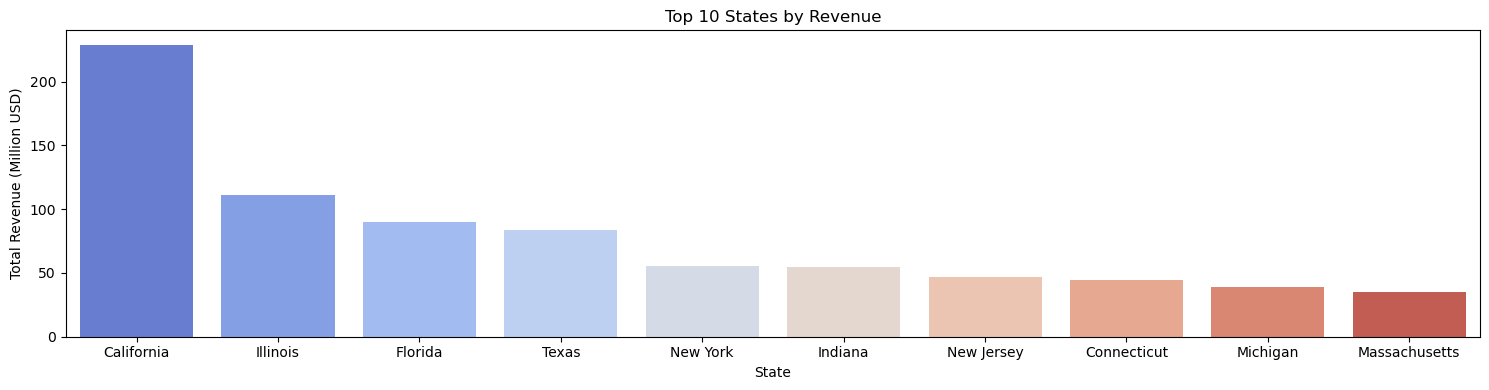

/var/folders/8w/_lqcq2kx1_75m_8zr4rkzgcr0000gn/T/ipykernel_6259/1570446598.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




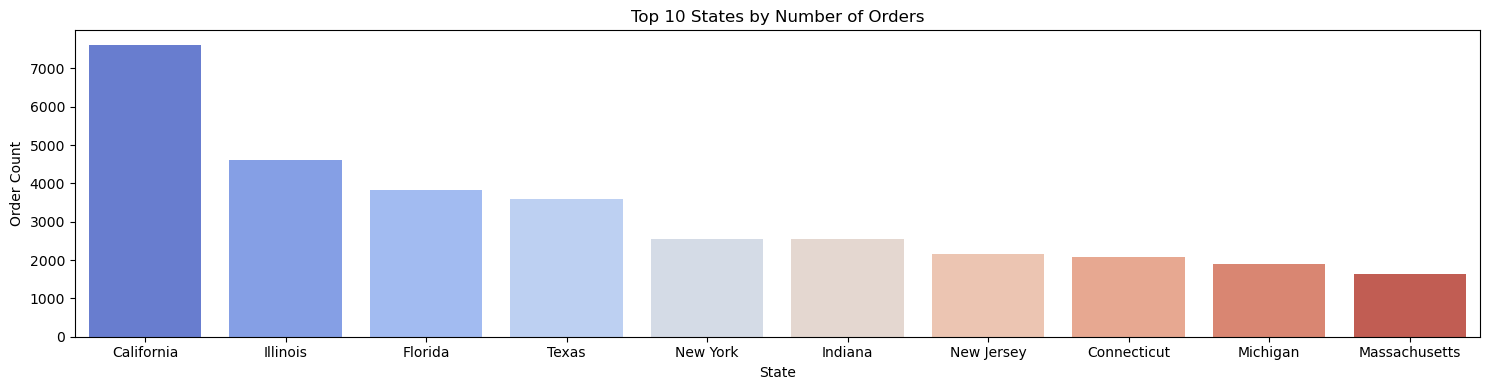

In [50]:
# Aggregate total revenue and unique order count per state
state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()                                       # Display the plot
     

#  14. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



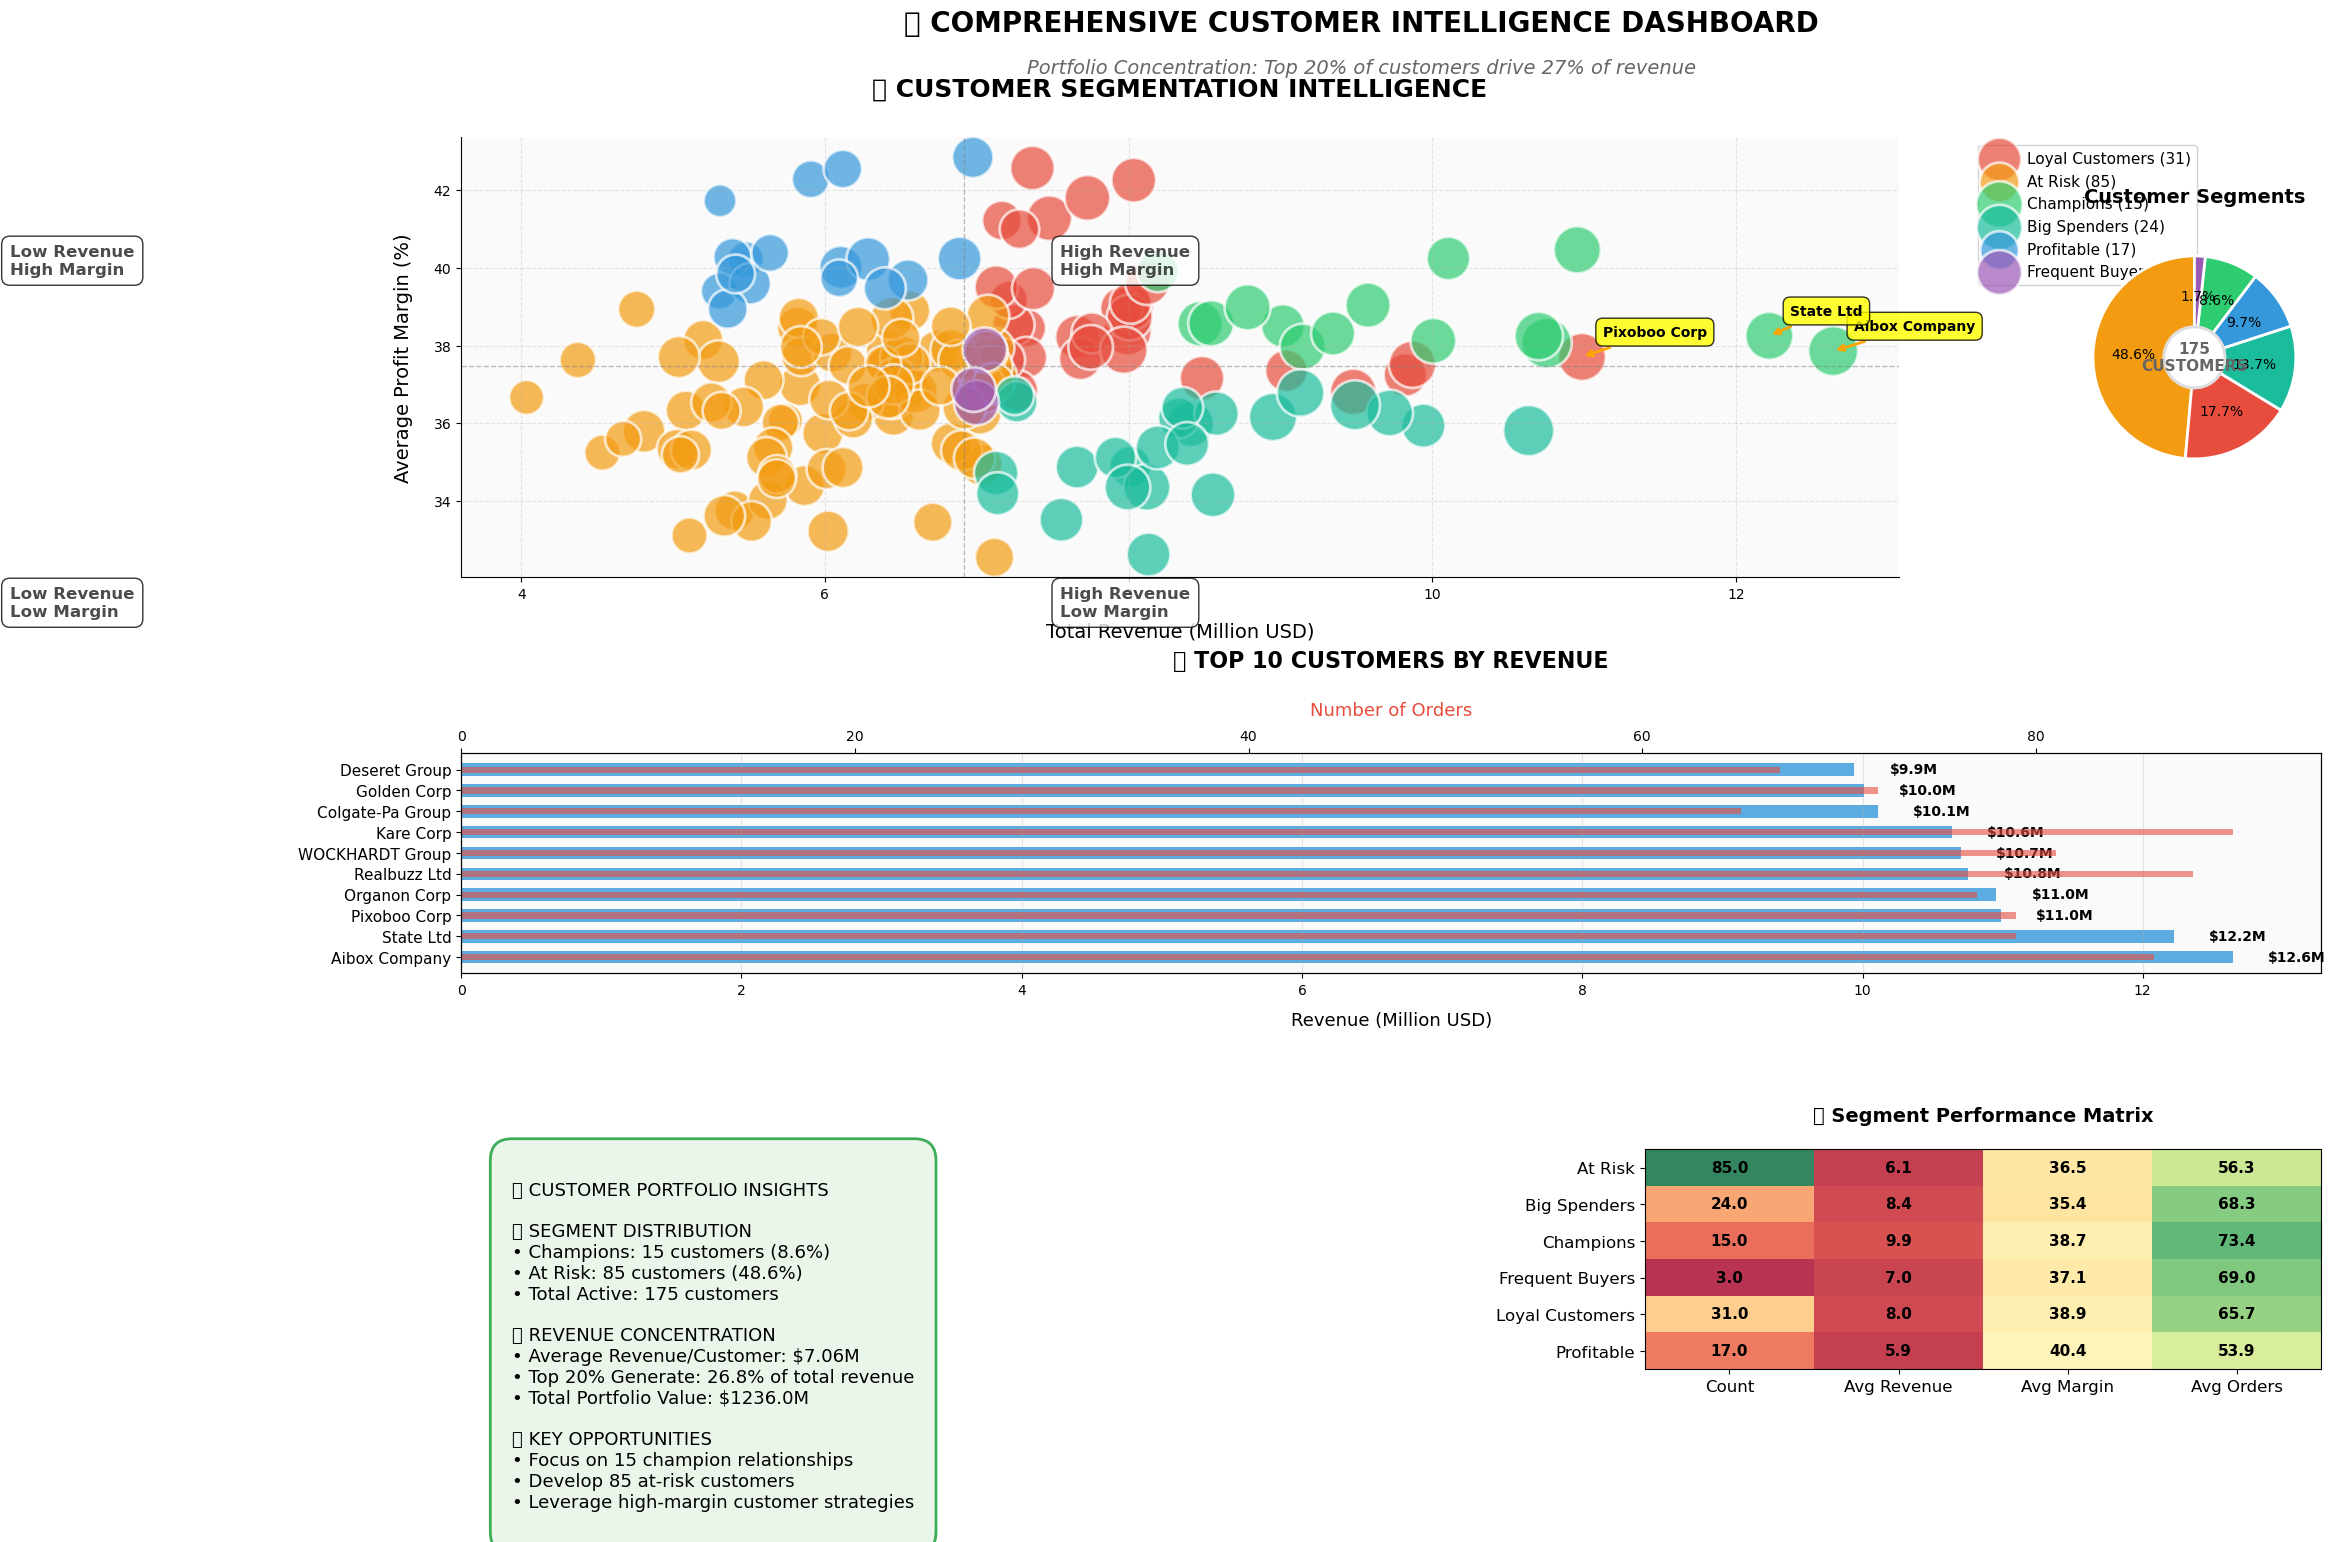

CUSTOMER SEGMENTATION EXECUTIVE SUMMARY
Total Customers: 175
Champions: 15 (8.6%)
At Risk: 85 (48.6%)
Average Revenue per Customer: $7.06M
Revenue Concentration: Top 20% = 26.8% of total
Recommended Focus: Retain 15 champions, develop 85 at-risk customers


In [55]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions and add additional metrics
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6
cust_summary['avg_order_value'] = cust_summary['total_revenue'] / cust_summary['orders']
cust_summary['profit_per_order'] = cust_summary['total_profit'] / cust_summary['orders']

# Customer segmentation based on RFM-like analysis
def segment_customers(row):
    revenue = row['total_revenue_m']
    margin = row['avg_margin']
    orders = row['orders']
    
    if revenue >= cust_summary['total_revenue_m'].quantile(0.8) and margin >= cust_summary['avg_margin'].quantile(0.6):
        return 'Champions', '#2ecc71'
    elif revenue >= cust_summary['total_revenue_m'].quantile(0.6) and margin >= cust_summary['avg_margin'].quantile(0.4):
        return 'Loyal Customers', '#3498db'
    elif revenue >= cust_summary['total_revenue_m'].quantile(0.6):
        return 'Big Spenders', '#f39c12'
    elif margin >= cust_summary['avg_margin'].quantile(0.8):
        return 'Profitable', '#9b59b6'
    elif orders >= cust_summary['orders'].quantile(0.8):
        return 'Frequent Buyers', '#1abc9c'
    else:
        return 'At Risk', '#e74c3c'

# Apply segmentation
cust_summary[['segment', 'color']] = cust_summary.apply(segment_customers, axis=1, result_type='expand')

# Create comprehensive dashboard with better spacing
fig = plt.figure(figsize=(24, 16))
gs = fig.add_gridspec(3, 4, height_ratios=[3, 1.5, 1.5], width_ratios=[3.5, 1.5, 1.5, 1.5],
                      hspace=0.6, wspace=0.5)

# Main enhanced bubble chart
ax_main = fig.add_subplot(gs[0, :3])

# Create bubble chart with enhanced styling
segments = cust_summary['segment'].unique()
segment_colors = dict(zip(segments, cust_summary.groupby('segment')['color'].first()))

for segment in segments:
    segment_data = cust_summary[cust_summary['segment'] == segment]
    
    scatter = ax_main.scatter(
        segment_data['total_revenue_m'],
        segment_data['avg_margin'],
        s=segment_data['orders'] * 15,  # Size based on order count
        c=segment_colors[segment],
        alpha=0.7,
        edgecolors='white',
        linewidth=2,
        label=f'{segment} ({len(segment_data)})'
    )

# Add quadrant lines for strategic analysis
median_revenue = cust_summary['total_revenue_m'].median()
median_margin = cust_summary['avg_margin'].median()

ax_main.axvline(x=median_revenue, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax_main.axhline(y=median_margin, color='gray', linestyle='--', alpha=0.5, linewidth=1)

# Add quadrant labels with better positioning
max_revenue = cust_summary['total_revenue_m'].max()
max_margin = cust_summary['avg_margin'].max()

ax_main.text(median_revenue + max_revenue*0.05, max_margin - 3, 'High Revenue\nHigh Margin', 
             fontsize=12, alpha=0.7, fontweight='bold', ha='left',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax_main.text(median_revenue + max_revenue*0.05, median_margin - max_margin*0.15, 'High Revenue\nLow Margin',
             fontsize=12, alpha=0.7, fontweight='bold', ha='left',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax_main.text(max_revenue*0.05, max_margin - 3, 'Low Revenue\nHigh Margin',
             fontsize=12, alpha=0.7, fontweight='bold', ha='left',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
ax_main.text(max_revenue*0.05, median_margin - max_margin*0.15, 'Low Revenue\nLow Margin',
             fontsize=12, alpha=0.7, fontweight='bold', ha='left',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

# Highlight top customers with better spacing
top_customers = cust_summary.nlargest(3, 'total_revenue_m')  # Reduced to top 3 for clarity
for idx, customer in top_customers.iterrows():
    ax_main.annotate(idx[:20] + '...' if len(idx) > 20 else idx,
                    (customer['total_revenue_m'], customer['avg_margin']),
                    xytext=(15, 15), textcoords='offset points',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', color='orange', lw=2))

# Enhanced styling with better spacing
ax_main.set_title('🎯 CUSTOMER SEGMENTATION INTELLIGENCE', 
                  fontsize=18, fontweight='bold', pad=30)
ax_main.set_xlabel('Total Revenue (Million USD)', fontsize=14, fontweight='medium', labelpad=15)
ax_main.set_ylabel('Average Profit Margin (%)', fontsize=14, fontweight='medium', labelpad=15)
ax_main.legend(bbox_to_anchor=(1.05, 1), loc='upper left', framealpha=0.9, fontsize=11)
ax_main.grid(True, alpha=0.3, linestyle='--')
ax_main.set_facecolor('#fafafa')

# Remove top and right spines
ax_main.spines['top'].set_visible(False)
ax_main.spines['right'].set_visible(False)

# Segment distribution pie chart (top-right)
ax_pie = fig.add_subplot(gs[0, 3])

segment_counts = cust_summary['segment'].value_counts()
colors = [segment_colors[segment] for segment in segment_counts.index]

wedges, texts, autotexts = ax_pie.pie(
    segment_counts.values,
    labels=None,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.7, edgecolor='white', linewidth=2)
)

# Add center circle for donut effect
centre_circle = plt.Circle((0,0), 0.3, fc='white', ec='#ddd', linewidth=2)
ax_pie.add_patch(centre_circle)
ax_pie.text(0, 0, f'{len(cust_summary)}\nCUSTOMERS', ha='center', va='center', 
            fontsize=11, fontweight='bold', color='#666')

ax_pie.set_title('Customer Segments', fontsize=14, fontweight='bold', pad=20)

# Customer value analysis (middle section)
ax_value = fig.add_subplot(gs[1, :])

# Top 10 customers by revenue (reduced for better readability)
top_10 = cust_summary.nlargest(10, 'total_revenue_m')

# Create stacked bar chart
bars1 = ax_value.barh(range(len(top_10)), top_10['total_revenue_m'], 
                     color='#3498db', alpha=0.8, label='Revenue', height=0.6)

# Add order count as secondary metric
ax_value2 = ax_value.twiny()
bars2 = ax_value2.barh(range(len(top_10)), top_10['orders'], 
                      color='#e74c3c', alpha=0.6, height=0.3, label='Orders')

# Customize the chart
ax_value.set_yticks(range(len(top_10)))
ax_value.set_yticklabels([name[:25] + '...' if len(name) > 25 else name 
                         for name in top_10.index], fontsize=11)
ax_value.set_xlabel('Revenue (Million USD)', fontsize=13, fontweight='medium', labelpad=10)
ax_value2.set_xlabel('Number of Orders', fontsize=13, fontweight='medium', color='#e74c3c', labelpad=10)

ax_value.set_title('💰 TOP 10 CUSTOMERS BY REVENUE', fontsize=16, fontweight='bold', pad=25)

# Add value labels with better spacing
for i, (customer, row) in enumerate(top_10.iterrows()):
    ax_value.text(row['total_revenue_m'] + max(top_10['total_revenue_m'])*0.02, i,
                 f'${row["total_revenue_m"]:.1f}M', va='center', ha='left',
                 fontsize=10, fontweight='bold')

ax_value.grid(axis='x', alpha=0.3)
ax_value.set_facecolor('#fafafa')

# Key metrics dashboard (bottom)
ax_metrics = fig.add_subplot(gs[2, :2])
ax_metrics.axis('off')

# Calculate key insights
total_customers = len(cust_summary)
champions = len(cust_summary[cust_summary['segment'] == 'Champions'])
at_risk = len(cust_summary[cust_summary['segment'] == 'At Risk'])
avg_revenue_per_customer = cust_summary['total_revenue_m'].mean()
top_20_pct_revenue = cust_summary.nlargest(int(total_customers*0.2), 'total_revenue_m')['total_revenue_m'].sum()
total_revenue = cust_summary['total_revenue_m'].sum()
pareto_ratio = (top_20_pct_revenue / total_revenue) * 100

metrics_text = f"""
📊 CUSTOMER PORTFOLIO INSIGHTS

🏆 SEGMENT DISTRIBUTION
• Champions: {champions} customers ({champions/total_customers*100:.1f}%)
• At Risk: {at_risk} customers ({at_risk/total_customers*100:.1f}%)
• Total Active: {total_customers:,} customers

💰 REVENUE CONCENTRATION  
• Average Revenue/Customer: ${avg_revenue_per_customer:.2f}M
• Top 20% Generate: {pareto_ratio:.1f}% of total revenue
• Total Portfolio Value: ${total_revenue:.1f}M

🎯 KEY OPPORTUNITIES
• Focus on {champions} champion relationships
• Develop {at_risk} at-risk customers
• Leverage high-margin customer strategies
"""

ax_metrics.text(0.05, 0.95, metrics_text, transform=ax_metrics.transAxes,
                fontsize=13, verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=1.2', facecolor='#e8f5e8', 
                         edgecolor='#28a745', linewidth=2, alpha=0.9))

# Performance matrix (bottom-right)
ax_matrix = fig.add_subplot(gs[2, 2:])

# Create performance matrix
segment_summary = cust_summary.groupby('segment').agg({
    'total_revenue_m': ['count', 'mean'],
    'avg_margin': 'mean',
    'orders': 'mean'
}).round(2)

# Flatten column names
segment_summary.columns = ['Count', 'Avg Revenue', 'Avg Margin', 'Avg Orders']

# Create heatmap
im = ax_matrix.imshow(segment_summary.values, cmap='RdYlGn', aspect='auto', alpha=0.8)

# Add text annotations with better spacing
for i in range(len(segment_summary)):
    for j in range(len(segment_summary.columns)):
        text = ax_matrix.text(j, i, f'{segment_summary.iloc[i, j]:.1f}',
                             ha="center", va="center", color="black", 
                             fontweight='bold', fontsize=11)

ax_matrix.set_xticks(range(len(segment_summary.columns)))
ax_matrix.set_yticks(range(len(segment_summary)))
ax_matrix.set_xticklabels(segment_summary.columns, fontsize=12)
ax_matrix.set_yticklabels(segment_summary.index, fontsize=12)
ax_matrix.set_title('📈 Segment Performance Matrix', fontsize=14, fontweight='bold', pad=20)

# Overall dashboard styling with better spacing
fig.suptitle('🎯 COMPREHENSIVE CUSTOMER INTELLIGENCE DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.96)

# Strategic insight subtitle
insight = f"Portfolio Concentration: Top 20% of customers drive {pareto_ratio:.0f}% of revenue"
fig.text(0.5, 0.92, insight, ha='center', fontsize=14, color='#666', style='italic')

fig.patch.set_facecolor('#ffffff')
plt.show()

# Executive summary
print("CUSTOMER SEGMENTATION EXECUTIVE SUMMARY")
print("=" * 60)
print(f"Total Customers: {total_customers:,}")
print(f"Champions: {champions} ({champions/total_customers*100:.1f}%)")
print(f"At Risk: {at_risk} ({at_risk/total_customers*100:.1f}%)")
print(f"Average Revenue per Customer: ${avg_revenue_per_customer:.2f}M")
print(f"Revenue Concentration: Top 20% = {pareto_ratio:.1f}% of total")
print(f"Recommended Focus: Retain {champions} champions, develop {at_risk} at-risk customers")

# 15. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

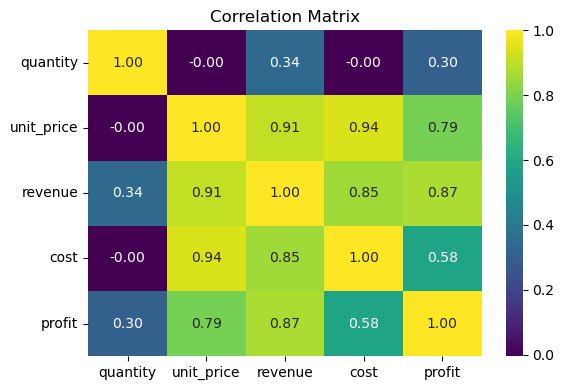

In [59]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

## Insights
- Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
- Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
- Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
- Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

# Saving preprocessed dataframe

In [60]:
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,...,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num,order_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2,2018-02


In [61]:
df.to_csv('Sales_data(EDA Exported).csv', index=False)

# Key Business Insights Discovered
## Product Performance

- Identified top revenue-generating products for strategic focus
- Revealed product portfolio concentration and diversification opportunities
- Highlighted seasonal demand patterns for inventory planning

## Channel Effectiveness

- Discovered channel performance gaps and optimization opportunities
- Identified most profitable channels and resource allocation priorities
- Revealed market share distribution across sales channels

## Customer Intelligence

- Segmented customers into strategic categories (Champions, At Risk, etc.)
- Discovered revenue concentration following Pareto principle (80/20 rule)
- Identified high-value customer relationships requiring retention focus

## Regional Performance

- Mapped geographic performance variations and market opportunities
- Identified top-performing regions and underperforming territories
- Revealed regional market concentration and expansion potential

## Profitability Analysis

- Uncovered price-margin relationships across product lines
- Identified optimal pricing strategies for different product categories
- Revealed volatility patterns in profit margins by channel

## Author
Made with love by Gul Amiz Ibrahimi, all rights protected.